# STEP 1: Data Background
Data yang akan digunakan untuk pembahasan kali ini adalah data perusahaan E-commerce Brasil yaitu OLIST. Kumpulan data yang akan saya bahas memuat 97.429 unique transaksi dari 94.256 customers, dengan periode datanya dimulai dari tahun 2016 sampai 2018 dan berisi informasi transaksi antara customer dan seller yang menggunakan platform E-commerce OLIST untuk melakukan transaksi.

Analisis yang akan saya sampaikan akan berisi 9 steps analisis dan akan lebih banyak membahas pertanyaan atau penyataan yang disertai visualisasi setelah analisis data dilakukan. Selain itu saya akan memberikan insight dan rekomendasi juga berdasarkan pemahaman saya bekerja sebagai tim operasional E-commerce di sebuah Startup Enabler Indonesia. Di awal akan ada penjelasan mengenai pengolahan data agar lebih jelas arah dari keputusan analisis yang saya ambil.

# STEP 2: Import Library & Read Data

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from operator import attrgetter
import matplotlib.colors as mcolors

In [4]:
folder = "beginner_project"

orders = pd.read_csv(f"{folder}/olist_orders_dataset.csv")
order_items = pd.read_csv(f"{folder}/olist_order_items_dataset.csv")
customers = pd.read_csv(f"{folder}/olist_customers_dataset.csv")
sellers = pd.read_csv(f"{folder}/olist_sellers_dataset.csv")
products = pd.read_csv(f"{folder}/olist_products_dataset.csv")
geolocation = pd.read_csv(f"{folder}/olist_geolocation_dataset.csv")
payments = pd.read_csv(f"{folder}/olist_order_payments_dataset.csv")
reviews = pd.read_csv(f"{folder}/olist_order_reviews_dataset.csv")

# STEP 3: Merge Dataset 
Merge semua dataset menggunakan key connection berdasarkan dataset framework dibawah:
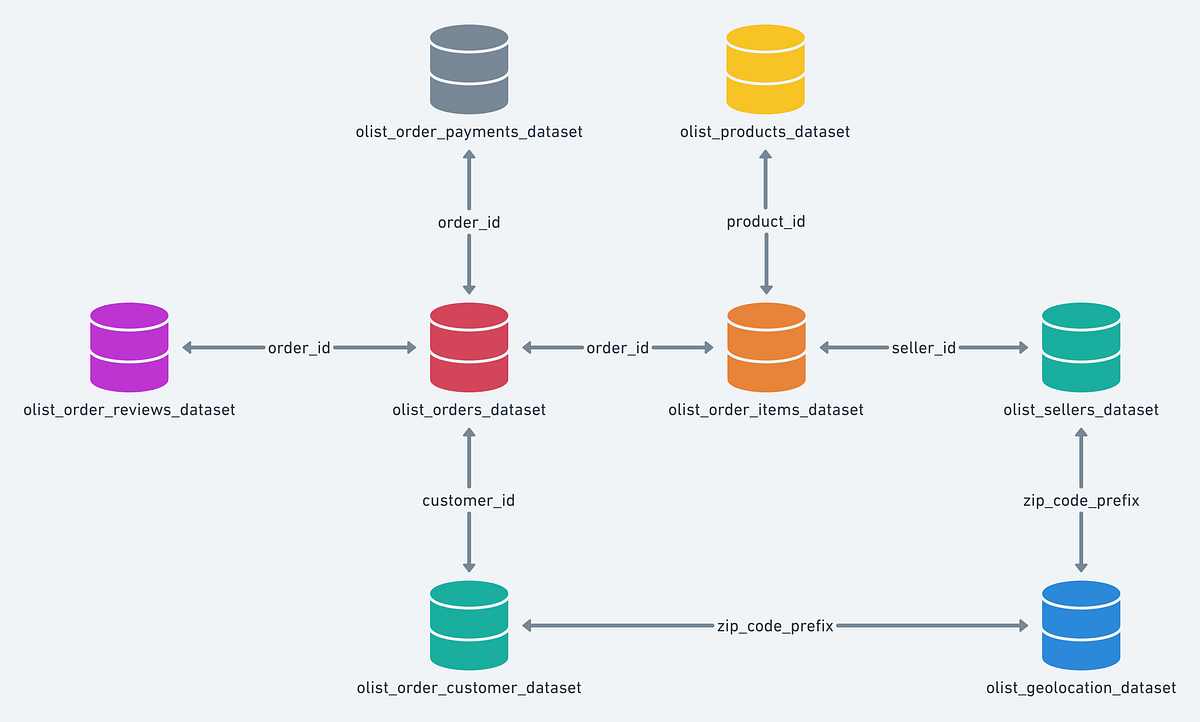

In [6]:
df = pd.merge(orders, order_items, on="order_id", how="inner")

In [7]:
df = pd.merge(df, customers, on="customer_id", how="inner")

In [8]:
df = pd.merge(df, sellers, on="seller_id", how="inner")

In [9]:
df = pd.merge(df, products, on="product_id", how="inner")

In [10]:
df = pd.merge(df, payments, on="order_id", how="inner")

In [11]:
df = pd.merge(df, reviews, on="order_id", how="inner")

In [12]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### Dikarenakan data geolocation banyak yang duplicate, terutama di bagian geolocation_zip_code_prefix, maka saya putuskan untuk membuang semua data yang duplicate. Alasannya saya buang data duplicate karena saya hanya butuh data unique geolocation_zip_code_prefix untuk menentukan geolocation para customer dan seller.

In [14]:
geolocation = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
999774,99955,-28.107588,-52.144019,vila langaro,RS
999780,99970,-28.345143,-51.876926,ciriaco,RS
999786,99910,-27.863500,-52.084760,floriano peixoto,RS
999803,99920,-27.858716,-52.300403,erebango,RS


In [15]:
df = pd.merge(df, geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner")
df = pd.merge(df, geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner", suffixes=('_customer', '_seller')) 
# suffixes dilakukan agar bisa langsung dibedakan antara seller dan customer zip_code_prefix. 
# kalau tidak diberi suffixes maka hasilnya akan menjadi x_zip_code_prefix dan y_zip_code_prefix 

In [16]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,-23.574809,-46.587471,sao paulo,SP,9350,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,-23.574809,-46.587471,sao paulo,SP,9350,-23.680114,-46.452454,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,-23.574809,-46.587471,sao paulo,SP,9350,-23.680114,-46.452454,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,-12.169860,-44.988369,barreiras,BA,31570,-19.810119,-43.984727,belo horizonte,MG
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,75265,-16.746337,-48.514624,vianopolis,GO,14840,-21.362358,-48.232976,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116745,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,11722,-24.001467,-46.446355,praia grande,SP,17602,-21.935321,-50.497562,tupa,SP
116746,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,45920,-17.891522,-39.370942,nova vicosa,BA,8290,-23.551013,-46.448489,sao paulo,SP
116747,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,-22.555985,-42.690761,japuiba,RJ,37175,-20.944706,-45.827098,ilicinea,MG
116748,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,-22.555985,-42.690761,japuiba,RJ,37175,-20.944706,-45.827098,ilicinea,MG


### Konversi kolom ke datatype yang benar

In [18]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
seller_zip_code_prefix                    int64
seller_city                              object
seller_state                            

In [19]:
# Mengkonversi setiap kolom date menjadi dtypes datetime64[ns]
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

# mengkonversi kolom yang ada di dalam variabel date_columns mendjadi datetime64[ns]
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')  # 'coerce' untuk menghandle invalid formats dengan mereplancenya ke NaT (Not a Time)

In [20]:
#df_null.to_csv("df_null.csv", index=False)

# STEP 4: Null Value Identification & Data Cleansing

In [22]:
df_null = df[df.isnull().any(axis=1)]
df_null

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,-23.574809,-46.587471,sao paulo,SP,9350,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,-23.574809,-46.587471,sao paulo,SP,9350,-23.680114,-46.452454,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,-23.574809,-46.587471,sao paulo,SP,9350,-23.680114,-46.452454,maua,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,75265,-16.746337,-48.514624,vianopolis,GO,14840,-21.362358,-48.232976,guariba,SP
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,-5.767733,-35.275467,sao goncalo do amarante,RN,31842,-19.840168,-43.923299,belo horizonte,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116745,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,11722,-24.001467,-46.446355,praia grande,SP,17602,-21.935321,-50.497562,tupa,SP
116746,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,45920,-17.891522,-39.370942,nova vicosa,BA,8290,-23.551013,-46.448489,sao paulo,SP
116747,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,-22.555985,-42.690761,japuiba,RJ,37175,-20.944706,-45.827098,ilicinea,MG
116748,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,-22.555985,-42.690761,japuiba,RJ,37175,-20.944706,-45.827098,ilicinea,MG


In [23]:
# null value checking di setiap kolom 
df.isnull().sum()

order_id                                     0
customer_id                                  0
order_status                                 0
order_purchase_timestamp                     0
order_approved_at                           15
order_delivered_carrier_date              1225
order_delivered_customer_date             2454
order_estimated_delivery_date                0
order_item_id                                0
product_id                                   0
seller_id                                    0
shipping_limit_date                          0
price                                        0
freight_value                                0
customer_unique_id                           0
customer_zip_code_prefix                     0
customer_city                                0
customer_state                               0
seller_zip_code_prefix                       0
seller_city                                  0
seller_state                                 0
product_categ

## Null value identication:
1. Data __order_approved_at yang null bisa jadi karena error di sistem__ karena semua data null yang ada di order_approved_at __status orderannya adalah delivered.__
    cara cleaning null value:
    - Cari tau dari order_purchase_timestamp sampai ke order_approved_at berapa lama rata-rata waktu yang dibutuhkan, lalu order_purchase_timestamp nya ditambah dengan hasil hitungan rata-rata
    - __[Pake cara ini karena cuman 15 data yang null]__ Cara gampang adalah mengisi order_approved_at dengan data yang sama degan order_purchase_timestamp nya karena ada kemungkinan orderan masuk bisa langsung di approve. Selain itu semua orderan yang order_approved_at nya null, statusnya delivered, jadi gak masalah kalau waktu order_approved_at dan order_purchase_timestamp sama.

2. Data order_delivered_carrier_date yang null bisa jadi casenya sama dengan order_approved_at yaitu error di sistem. Cara fill null value dengan menambahkan df['order_approved_at'] + rata-rata waktu yang dibutuhkan seluruh orderan bergerak dari 'order_approved_at' berubah menjadi'order_delivered_carrier_date'.

   df['order_approved_at'] + (df['order_approved_at']' - df['order_delivered_carrier_date']).mean()

3. Data __order_delivered_customer_date__ yang null, reason dan perlakuannya untuk cleansing data nullnya bisa beda-beda berdasarkan order_statusnya.
   cara cleaning null value:
   - Data order_delivered_customer_date yang null dengan status orderan [delivered] indikasinya karena ada sistem error karena seharusnya kalau order_statusnya delivered akan muncul order_delivered_customer_date tapi untuk beberapa kasus tanggalnya null artinya ada indikasi error pencatatan di sistem. Cara cleansingnya bisa memakai data order_estimated_delivery_date untuk mengisi nullnya, karena statusnya sudah delivered artinya orderannya sudah bisa dipastikan sampai di tangan customer dan tanggal sampainya paling lambat adalah tanggal yang tertera di order_estimated_delivery_date.
   - Data order_delivered_customer_date yang null dengan order_status [approved, canceled, unavailable, invoiced, processing, shipped] sudah dipastikan belum sampai atau di beberapa case(canceled,unavailable) tidak akan terdeliver ke customer artinya order_delivered_customer_date belum muncul atau tidak akan muncul di sistem, jadi seharusnya valid kalau nullnya dibiarkan saja. Cara cleansingnya bisa diubah null valuenya menjadi NaT (Not a Time).


4. Data __product_weight_g, product_length_cm, product_height_cm, product_width_cm__ ini datanya memang tidak diisi di database olist_product_dataset. Bisa jadi karena PIC yang seharusnya mengisi informasi volume produknya membuat kesalahan pada saat mengisi informasinya sehingga datanya kosong. Contohnya tidak ada data volume untuk product_id 5eb564652db742ff8f28759cd8d2652a di data olist_product_dataset, artinya dari data pusat olist_product_dataset datanya kosong.

    Selain itu diketahui untuk orderan yang null berat, panjang, lebar dan tinggi produknya semua statusnya delivered, artinya freight_value yang tercatat sudah dibayarkan dan kalau dicleansing datanya dengan mengisi gramasi, panjang, lebar dan tinggi tidak akan berpengaruh lagi karena ongkirnya sudah dibayar.
    
    Maka dari pertimbangan di atas saya memutuskan untuk mengisi null value di product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan value 0 atau fillna(0)
    
5. Data __product_category_name, product_name_lenght, product_description_lenght, product_photos_qty__ = tidak diisi nama, deskripsi dan foto oleh PIC dan ini hal yang sangat mungkin terjadi > null valuenya bisa diganti dengan "No Information" untuk product_category_name dan untuk product_name_lenght, product_description_lenght, product_photos_qty diisi dengan 0/fillna(0) dengan harapan semua yang membaca data dengan value "No Information" di product_category_name bisa segera melengkapi deskripsi produknya. 

6. Data __review_comment_title & review_comment_message__: karena customer gak ngisi title review dan kolom review > gak pengaruh dengan data keseluruhan > isi dengan "No Review Comment"

# Data Cleansing

### 1. Data __order_approved_at yang null bisa jadi karena error di sistem__ karena semua data null yang ada di order_approved_at __status orderannya adalah delivered.__
    - __[Pake cara ini karena cuman 15 data yang null]__ Cara gampang adalah mengisi data null order_approved_at dengan data yang sama dengan order_purchase_timestamp nya karena masuk akal dan ada kemungkinan orderan masuk bisa langsung di approve. Selain itu semua orderan yang order_approved_at nya null, statusnya delivered, jadi gak masalah kalau waktu order_approved_at dan order_purchase_timestamp sama.

In [27]:
df['order_approved_at'] = df['order_approved_at'].fillna(df['order_purchase_timestamp']) # dt.hour = missing value akan diisi dengan value Jam yang ada di dalam kolom datetime

In [28]:
# Ngecek null value di order_approved_at setelah dibersihkan dan direplace null valuenya
df['order_approved_at'].isnull().sum()

0

### 2. Data __order_delivered_carrier_date__ yang null dengan cara fill null value dengan menambahkan df['order_approved_at'] + rata-rata waktu yang dibutuhkan seluruh orderan bergerak dari 'order_approved_at' berubah menjadi'order_delivered_carrier_date'.

df['order_approved_at'] + [(df['order_approved_at']' - df['order_delivered_carrier_date']).mean()]

In [30]:
# Menghitung perbedaan waktu rata-rata dengan mengabaikan baris dengan NaT di kedua kolom
average_time_approved_to_carrier = (
    (df['order_delivered_carrier_date'] - df['order_approved_at'])
    .dropna()  # mengabaikan baris dengan NaT
    .dt.total_seconds()
    .mean()
)

# Mengisi nilai null di 'order_delivered_carrier_date' dengan waktu rata-rata yang ditambahkan ke 'order_approved_at'
df['order_delivered_carrier_date'] = df.apply(
    lambda row: row['order_approved_at'] + pd.to_timedelta(average_time_approved_to_carrier, unit='s')
    if pd.isna(row['order_delivered_carrier_date']) else row['order_delivered_carrier_date'],
    axis=1
)

In [31]:
df['order_delivered_carrier_date'].isnull().sum()

0

### 3. Data __order_delivered_customer_date__ yang null, reason dan perlakuannya untuk cleansing data nullnya bisa beda-beda berdasarkan order_statusnya.
   cara cleaning null value:
   - Data order_delivered_customer_date yang null dengan status orderan [delivered] indikasinya karena ada sistem error karena seharusnya kalau order_statusnya delivered akan muncul order_delivered_customer_date tapi untuk beberapa kasus tanggalnya null artinya ada indikasi error pencatatan di sistem. Cara cleansingnya bisa memakai data order_estimated_delivery_date untuk mengisi nullnya, karena statusnya sudah delivered artinya orderannya sudah bisa dipastikan sampai di tangan customer dan tanggal sampainya paling lambat adalah tanggal yang tertera di order_estimated_delivery_date.
   - Data order_delivered_customer_date yang null dengan order_status [approved, canceled, unavailable, invoiced, processing, shipped] sudah dipastikan belum atau di beberapa case(canceled,unavailable) tidak akan terdeliver ke customer artinya order_delivered_customer_date belum muncul atau tidak akan muncul di sistem, jadi seharusnya valid kalau nullnya dibiarkan saja. Cara cleansingnya bisa diubah null valuenya menjadi NaT (Not a Time).

a. Pertama cleansing data untuk orderan yang order_statusnya 'delivered' dan data order_delivered_customer_date nya null.  
Cleansingnya dengan memakai data order_estimated_delivery_date untuk mengisi nullnya

In [34]:
# Data order_delivered_customer_date yang null dengan order_status 'delivered' diisi dengan tanggal order_estimated_delivery_date
# Alasannya orderan yang statusnya 'delivered' sudah bisa dipastikan sampai di tangan customer paling lambat di tanggal order_estimated_delivery_date.
delivered_mask = (df['order_status'] == 'delivered') & (df['order_delivered_customer_date'].isna())
df.loc[delivered_mask, 'order_delivered_customer_date'] = df.loc[delivered_mask, 'order_estimated_delivery_date']

print(df['order_delivered_customer_date'].isna().sum()) 

2446


b. Kedua cleansing data untuk order_delivered_customer_date yang status orderannya 'approved', 'canceled', 'unavailable', 'invoiced', 'processing', 'shipped'. 
Untuk data berikut seharusnya tidak perlu dibuatkan code lagi untuk cleansing karena null valuenya sudah diubah menjadi NaT (Not a Time) di script sebelumnya dengan errors='coerce'.

Tapi untuk memastikan semua data yang null diisi dengan NaT, maka diulang lagi pemberian NaT nya ke null value

In [36]:
status_to_update = ['approved', 'canceled', 'unavailable', 'invoiced', 'processing', 'shipped']

# Buat variable untuk memilih baris dengan status yang ditentukan serta bernilai null di 'order delivered customer_data'
status_mask = (df['order_status'].isin(status_to_update)) & (df['order_delivered_customer_date'].isna())

# Opsi 1: Isi status dengan NaT/Not a Time(null yang kompatibel dengan tanggal dan waktu)
df.loc[status_mask, 'order_delivered_customer_date'] = pd.NaT

print(df['order_delivered_customer_date'].isna().sum())

2446


### 4. Data __product_weight_g, product_length_cm, product_height_cm, product_width_cm__ ini datanya memang tidak diisi di database olist_product_dataset. Bisa jadi karena PIC yang seharusnya mengisi informasi volume produknya membuat kesalahan pada saat mengisi informasinya sehingga datanya kosong. Contohnya tidak ada data volume untuk product_id 5eb564652db742ff8f28759cd8d2652a di data olist_product_dataset, artinya dari data pusat olist_product_dataset datanya kosong.

    Selain itu diketahui untuk orderan yang null berat, panjang, lebar dan tinggi produknya semua statusnya delivered, artinya freight_value yang tercatat sudah dibayarkan dan kalau dicleansing datanya dengan mengisi gramasi, panjang, lebar dan tinggi tidak akan berpengaruh lagi karena ongkirnya sudah dibayar.
    
    Maka dari pertimbangan di atas saya memutuskan untuk mengisi null value di product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan value 0 atau fillna(0)

In [38]:
df_null = df[df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().any(axis=1)]
df_null = df_null[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_status']]

df_null

# Bisa dilihat semua orderan yang weightnya null, volumenya (p x l x t) juga ikut null dan semua statusnya delivered 

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_status
8617,NaN,NaN,NaN,NaN,delivered
9103,NaN,NaN,NaN,NaN,delivered
9104,NaN,NaN,NaN,NaN,delivered
22157,NaN,NaN,NaN,NaN,delivered
22158,NaN,NaN,NaN,NaN,delivered
22159,NaN,NaN,NaN,NaN,delivered
33133,NaN,NaN,NaN,NaN,delivered
37367,NaN,NaN,NaN,NaN,delivered
42069,NaN,NaN,NaN,NaN,delivered
42070,NaN,NaN,NaN,NaN,delivered


In [39]:
# Maka untuk mengisi product_weight_g, product_length_cm, product_height_cm, product_width_cm yang null, akan digunakan fillna (0)

df['product_weight_g'] = df['product_weight_g'].fillna(0)
df['product_length_cm'] = df['product_length_cm'].fillna(0) 
df['product_height_cm'] = df['product_height_cm'].fillna(0) 
df['product_width_cm'] = df['product_width_cm'].fillna(0) 


### 5. Data __product_category_name, product_name_lenght, product_description_lenght, product_photos_qty__ = tidak diisi nama, deskripsi dan foto oleh PIC dan ini hal yang sangat mungkin terjadi > null valuenya bisa diganti dengan "No Information" untuk product_category_name dan untuk product_name_lenght, product_description_lenght, product_photos_qty diisi dengan 0/fillna(0) dengan harapan semua yang membaca data dengan value "No Information" di product_category_name bisa segera melengkapi deskripsi produknya. 

In [41]:
df['product_category_name'] = df['product_category_name'].fillna('No Information')
df['product_name_lenght'] = df['product_name_lenght'].fillna(0)
df['product_description_lenght'] = df['product_description_lenght'].fillna(0) 
df['product_photos_qty'] = df['product_photos_qty'].fillna(0) 

### 6. Data __review_comment_title & review_comment_message__: karena customer gak ngisi title review dan kolom review > gak pengaruh dengan data keseluruhan > isi dengan "No Review Comment"

In [43]:
df['review_comment_title'] = df['review_comment_title'].fillna('No Review Comment')
df['review_comment_message'] = df['review_comment_message'].fillna('No Review Comment')

In [44]:
df.isnull().sum()

order_id                                   0
customer_id                                0
order_status                               0
order_purchase_timestamp                   0
order_approved_at                          0
order_delivered_carrier_date               0
order_delivered_customer_date           2446
order_estimated_delivery_date              0
order_item_id                              0
product_id                                 0
seller_id                                  0
shipping_limit_date                        0
price                                      0
freight_value                              0
customer_unique_id                         0
customer_zip_code_prefix                   0
customer_city                              0
customer_state                             0
seller_zip_code_prefix                     0
seller_city                                0
seller_state                               0
product_category_name                      0
product_na

# STEP 5: Add columns

1.	Add columns based on the time period from the order purchase timestamp column
2.	Add columns by year
3.	Add columns by month
4.	Add columns by name of the day
5.	Add columns by hour
6.	Add columns based on the actual price the customer purchased  
    a.	Total price value  
    b.	Total freight value  
    c.	Total order value (total price + total freight)  

  E.g. Total Order Value    

  a.	Total price value = $95 (harga)  

  b. Total freight value = $100 (kargo/pengantaran)  

  c.	Total order value = $95 + $100 = $195

In [46]:
# 1. Mendefinisikan periode waktu menggunakan order_purchase_timestamp sebagai acuan  
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_period'] = df['order_purchase_timestamp'].dt.hour.apply(get_time_period)

# 2. Menambahkan kolom tahun menggunakan order_purchase_timestamp sebagai acuan  
df['year'] = df['order_purchase_timestamp'].dt.year

# 3. Menambahkan kolom bulan menggunakan order_purchase_timestamp sebagai acuan 
df['month'] = df['order_purchase_timestamp'].dt.month

# 4. Menambahkan kolom nama hari menggunakan order_purchase_timestamp sebagai acuan 
df['day_name'] = df['order_purchase_timestamp'].dt.day_name()

# 5. Menambahkan kolom jam menggunakan order_purchase_timestamp sebagai acuan 
df['hour'] = df['order_purchase_timestamp'].dt.hour

# 6. Menambahkan kolom Total Order Value menggunakan price + freight_value
df['total_order_value'] = df['price'] + df['freight_value'] 

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,time_period,year,month,day_name,hour,total_order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,maua,SP,Morning,2017,10,Monday,10,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,maua,SP,Morning,2017,10,Monday,10,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,maua,SP,Morning,2017,10,Monday,10,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,-19.810119,-43.984727,belo horizonte,MG,Evening,2018,7,Tuesday,20,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,-21.362358,-48.232976,guariba,SP,Morning,2018,8,Wednesday,8,179.12


In [47]:
# df.to_csv("df_olist_ecommerce.csv", index=False)

# STEP 6: Customer Demographic

### 1. Change the name of the state and city columns to address static and address city then do a grouping to calculate the total unique customer id based on the state address and it’s visualization  
state → address_static  
city → address_city


In [50]:
df.rename(columns={
    'customer_city' : 'customer_address_city',
    'customer_state' : 'customer_address_static',
},inplace=True)

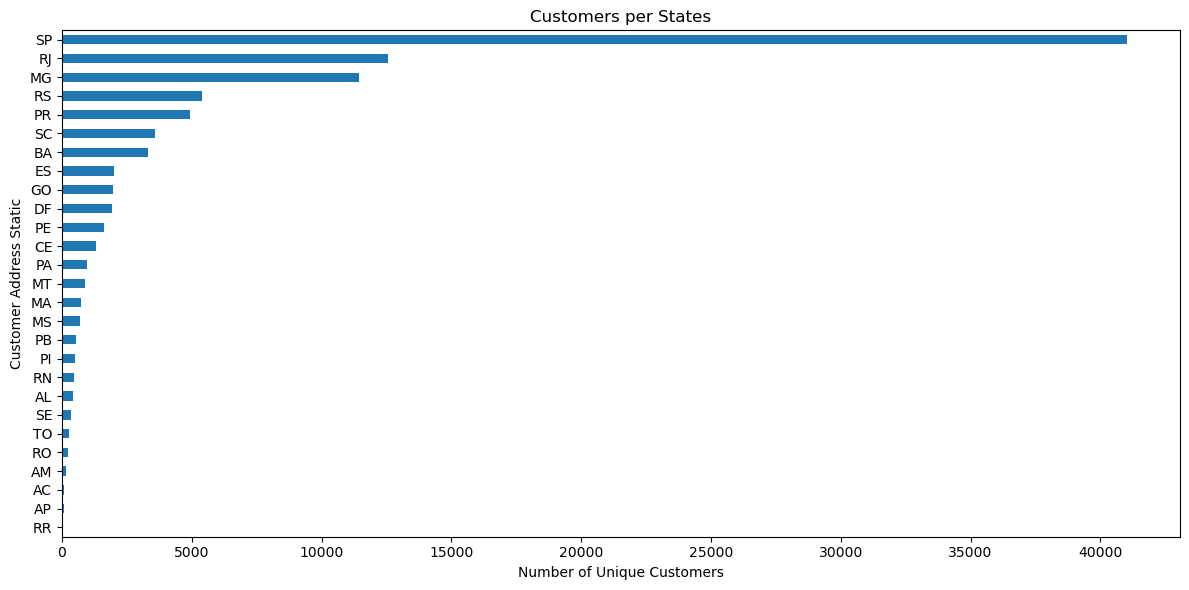

In [51]:
# Agregasi data customer_id dan digrouping by customer_address_static
customers_per_states = df.groupby('customer_address_static').agg({'customer_id':'nunique'}).sort_values('customer_id', ascending=False)

# Visualisasi data
customers_per_states.plot(kind='barh', figsize=(12, 6), legend=False)

plt.title('Customers per States')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Customer Address Static')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Script di bawah untuk menambahkan legend agar lebih mudah dibaca dan dicerna informasinya 

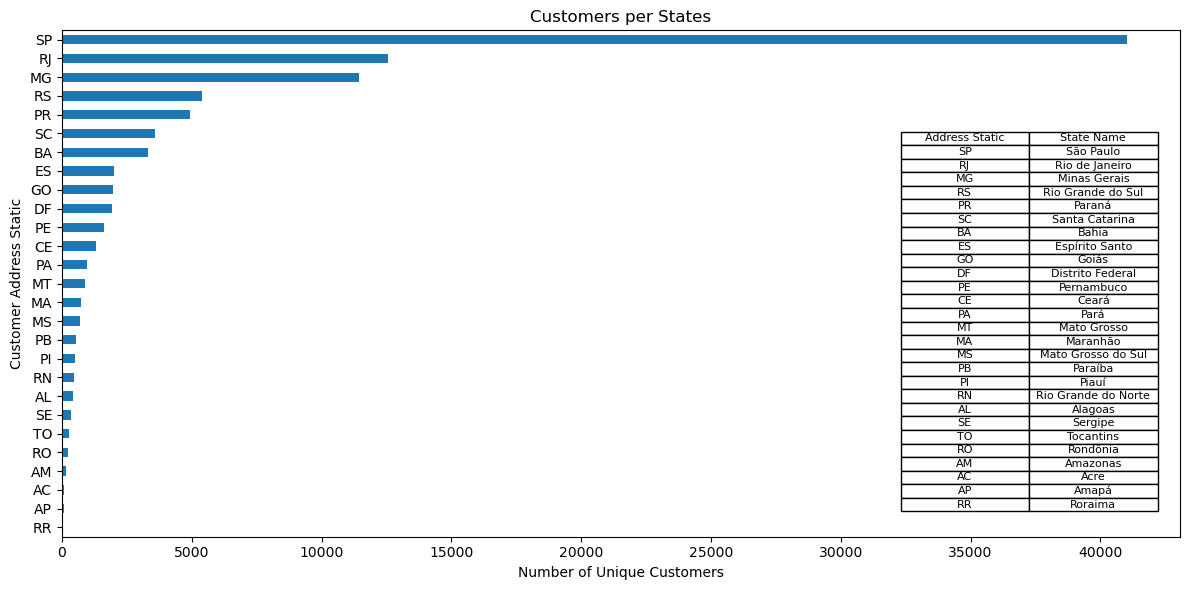

In [53]:
# Agregasi data customer_id dan digrouping by customer_address_static
customers_per_states = df.groupby('customer_address_static').agg({'customer_id':'nunique'}).sort_values('customer_id', ascending=False)

# State mapping
state_mapping = {
    "SP": "São Paulo",
    "RJ": "Rio de Janeiro",
    "MG": "Minas Gerais",
    "RS": "Rio Grande do Sul",
    "PR": "Paraná",
    "SC": "Santa Catarina",
    "BA": "Bahia",
    "ES": "Espírito Santo",
    "GO": "Goiás",
    "DF": "Distrito Federal",
    "PE": "Pernambuco",
    "CE": "Ceará",
    "PA": "Pará",
    "MT": "Mato Grosso",
    "MA": "Maranhão",
    "MS": "Mato Grosso do Sul",
    "PB": "Paraíba",
    "PI": "Piauí",
    "RN": "Rio Grande do Norte",
    "AL": "Alagoas",
    "SE": "Sergipe",
    "TO": "Tocantins",
    "RO": "Rondônia",
    "AM": "Amazonas",
    "AC": "Acre",
    "AP": "Amapá",
    "RR": "Roraima"
}

# Membuat barplotnya
ax = customers_per_states.plot(kind='barh', figsize=(12, 6), legend=False)
plt.title('Customers per States')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Customer Address Static')
plt.gca().invert_yaxis()

# Menambahkan table legend ke chart
table_data = [[key, value] for key, value in state_mapping.items()]
table = plt.table(cellText=table_data, colLabels=["Address Static", "State Name"], loc='lower right', cellLoc='center', bbox=[0.75, 0.05, 0.23, 0.75])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.tight_layout()
plt.show()

In [54]:
# customers_per_states.to_csv("customers_per_states.csv")

### 2. Create a grouping to calculate the total unique customer id based on the address city and its visualization

In [56]:
df.groupby('customer_address_city').agg({'customer_id':'nunique'}).sort_values('customer_id', ascending=False)

,customer_id
customer_address_city,
sao paulo,15256
rio de janeiro,6728
belo horizonte,2724
brasilia,1935
curitiba,1497
...,...
nova america,1
itacoatiara,1
capela nova,1


### Karena customer_address_city mencapai 4059 city dan agar tidak overplotting, maka hanya menampilkan Top 20 Cities by customer_unique_id

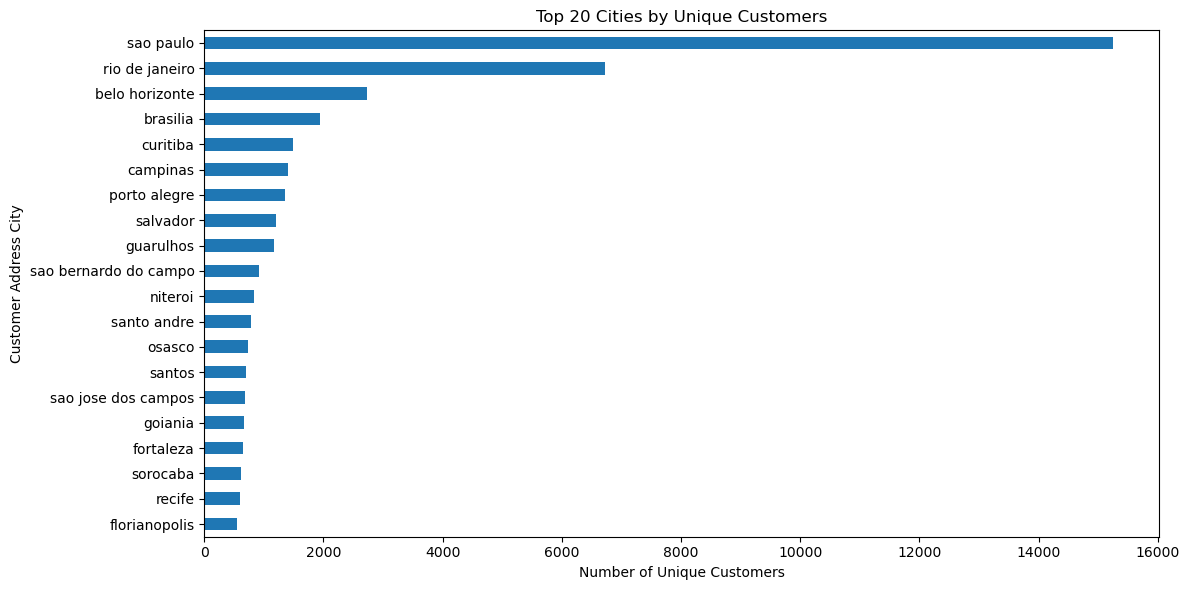

In [58]:
# Diambil dulu top 20 cities
top_20_cities = df.groupby('customer_address_city').agg({'customer_id':'nunique'}).sort_values('customer_id', ascending=False).head(20)

# Baru dimasukkan ke visualisasi
top_20_cities.plot(kind='barh', figsize=(12, 6), legend=False)

plt.title('Top 20 Cities by Unique Customers')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Customer Address City')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Insight & Suggestion/Recommendation from Top 20 Customer Cities & States
Insight:   
- Top 3 customers per states inline dengan data populasi Brazil di tahun 2022 dengan 3 state paling tinggi jumlah penduduknya adalah São Paulo, Minas Gerais dan Rio de Janeiro.
- Top 3 customers per city juga inline dengan top 3 states (top 3 city = capital city dari top 3 states)
- Kesamaan dari 3 state terbawah (Acre, Amapa, Roraima) merupakan daerah yang sangat jauh dari Sao Paulo, jaraknya bisa sampai 4000an km. Ini menandakan kendala 3 state tersebut menjadi 3 terbawah adalah karena jarak. 
- Sedangkan Top 20 Cities adalah kota-kota yang masih disekitaran Sao paulo dengan jarak hanya sekitar 120an km. 

Suggestion/Recommendation:  
- Untuk fokus campaign marketing dan distribusi serta optimalisasi logistik bisa difokuskan ke Top 3 State & City untuk mengenerate GMV.
- Untuk potensi pendapatan lebih tinggi di masa depan, bisa dilakukan eksplorasi pasar ke wilayah kota yang menempati peringkat tengah seperti Salvador, Fortaleza, dan Recife.

### 3.	Make a table regarding the total orders for each customer, then create a column that describes the frequency of orders for each customer (assuming = if below equals 5 it is called a little, otherwise it is a lot)

In [61]:
# Pertama digrouping dulu by customer_unique_id untuk mendapatkan total count orderan per customer_unique_id
total_customer_orders = df.groupby('customer_unique_id').agg(total_orders=('order_id', 'count')).reset_index()

# Kedua define function untuk melabeli total_orders yang di bawah 5 as 'a little', else 'a lot'
def customer_order_frequency(total_orders):
    if total_orders < 5:
        return 'a little'
    else:
        return 'a lot'

# Ketiga tambahin kolom 'order_frequency' 
# yang isinya mengapply function customer_order_frequency ke kolom total_orders yang ada di tabel total_customer_order
total_customer_orders['order_frequency'] = total_customer_orders['total_orders'].apply(customer_order_frequency)

total_customer_orders

,customer_unique_id,total_orders,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,a little
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,a little
2,0000f46a3911fa3c0805444483337064,1,a little
3,0000f6ccb0745a6a4b88665a16c9f078,1,a little
4,0004aac84e0df4da2b147fca70cf8255,1,a little
...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,2,a little
94252,fffea47cd6d3cc0a88bd621562a9d061,1,a little
94253,ffff371b4d645b6ecea244b27531430a,1,a little
94254,ffff5962728ec6157033ef9805bacc48,1,a little


In [62]:
total_customer_orders['order_frequency'].value_counts()

order_frequency
a little    93367
a lot         889
Name: count, dtype: int64

C:\Users\benny\AppData\Local\Temp\ipykernel_4296\1102494460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=total_customer_orders, x='order_frequency', palette="viridis")


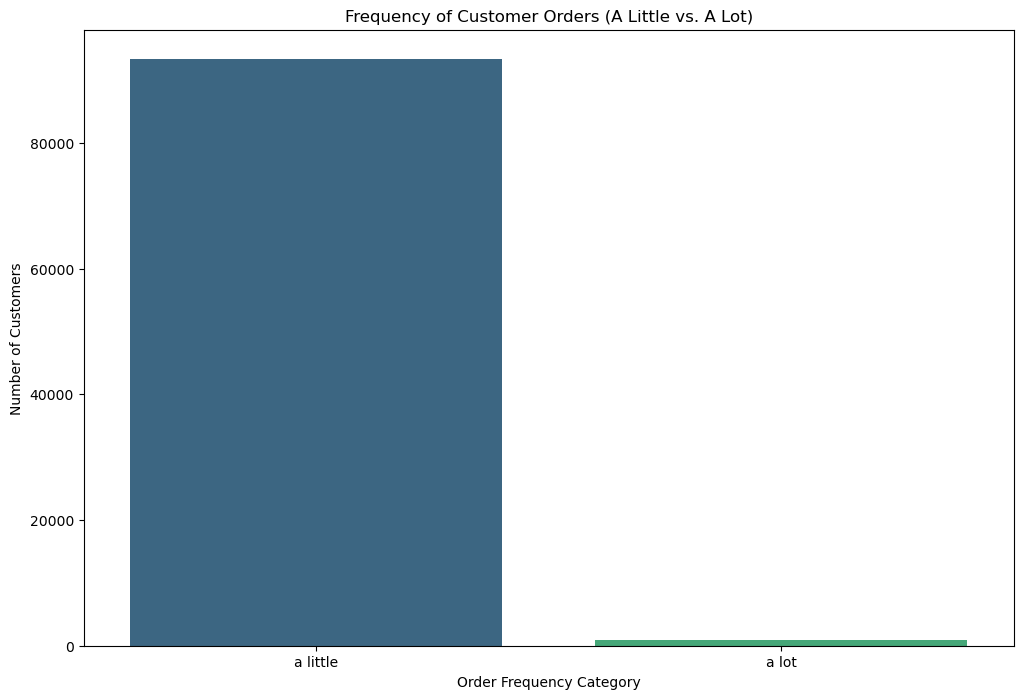

In [63]:
# Visualization
plt.figure(figsize=(12, 8))
sns.countplot(data=total_customer_orders, x='order_frequency', palette="viridis")
plt.title("Frequency of Customer Orders (A Little vs. A Lot)")
plt.xlabel("Order Frequency Category")
plt.ylabel("Number of Customers")
plt.show()

### Insight & Suggestion/Recommendation from Frequency of Customer Orders
Insight:  
- Frekuensi transaksi OLIST E-commerce didominasi oleh transaksi yang frekuensinya kecil atau kurang dari 5 kali dalam jangka waktu 2 tahun.
- Churn rate OLIST sangatlah tinggi dan kemampuan customer retention OLIST untuk mempertahankan customer baru agar tetap bertransaksi lewat platform mereka sangatlah lemah.  

Suggestion/Recommendation:
- Menganalisis kembali alasan kenapa churn rate sangat tinggi.
- Melakukan loyalty program dan referral program untuk mempertahankan customer yang sudah ada dan mengakuisisi customer baru lewat invitation yang dilakukan customer lama.
- Melakukan blast email berisi promo-promo ke semua customer yang pernah mendaftarkan email mereka ke database OLIST.

In [65]:
# Pertama digrouping dulu by customer_unique_id untuk mendapatkan total count unique orderan per customer_unique_id
total_customer_unique_order = df.groupby('customer_unique_id').agg(total_orders=('order_id', 'nunique')).reset_index()

# Kedua define function untuk melabeli total_orders yang di bawah 5 as 'a little', else 'a lot'
def customer_order_frequency(total_orders):
    if total_orders < 5:
        return 'a little'
    else:
        return 'a lot'

# Ketiga tambahin kolom 'order_frequency' 
# yang isinya mengapply function customer_order_frequency ke kolom total_orders yang ada di tabel total_customer_order
total_customer_unique_order['order_frequency'] = total_customer_unique_order['total_orders'].apply(customer_order_frequency)

total_customer_unique_order

,customer_unique_id,total_orders,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,a little
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,a little
2,0000f46a3911fa3c0805444483337064,1,a little
3,0000f6ccb0745a6a4b88665a16c9f078,1,a little
4,0004aac84e0df4da2b147fca70cf8255,1,a little
...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,1,a little
94252,fffea47cd6d3cc0a88bd621562a9d061,1,a little
94253,ffff371b4d645b6ecea244b27531430a,1,a little
94254,ffff5962728ec6157033ef9805bacc48,1,a little


In [66]:
total_customer_unique_order['order_frequency'].value_counts()

order_frequency
a little    94237
a lot          19
Name: count, dtype: int64

In [67]:
# customer_order.to_csv("customer_order_nunique.csv", index=False)

### 4.	Create a table that lists the first and last purchase dates for each customer, then combine the first purchase, last purchase, and total order tables to generate the difference total order between the last purchase date and the first purchase date

In [69]:
# 1. Buat tabel yang isinya first_purchase_date dan last_purchase_date untuk tiap customer_unique_id
customer_purchase_dates = df.groupby('customer_unique_id').agg(
    first_purchase_date=('order_purchase_timestamp', 'min'), # mencari tanggal purchase pertama dari customer_unique_id
    last_purchase_date=('order_purchase_timestamp', 'max') # mencari tanggal purchase terakhir dari customer_unique_id
).reset_index()

# 2. Menghitung total orders dari first_purchase_date
total_orders_on_first_purchase = pd.merge(
    customer_purchase_dates[['customer_unique_id', 'first_purchase_date']], # merge customer_unique_id dan first_purchase_dates yg diambil dari tabel customer_purchase_dates
    df.groupby(['customer_unique_id', 'order_purchase_timestamp']).agg( # di merge dengan data df yg digrouping by customer_unique_id & order_purchase_timestamp
        total_orders=('order_id', 'count') # total count orderan yang dilakukan setiap customer_unique_id 
    ).reset_index(),
    left_on=['customer_unique_id', 'first_purchase_date'], # menempatkan tabel customer_unique_id dari first_purchase_date di sebelah kiri
    right_on=['customer_unique_id', 'order_purchase_timestamp'], # menempatkan tabel customer_unique_id dari order_purchase_timestamp di sebelah kanan
    how='left' # lalu di LEFT JOIN, artinya mempertahankan tabel first_purchase_date biarpun tidak ada kecocokan dgn data order_purchase_timestamp
).drop(columns=['order_purchase_timestamp']) # mendrop tabel order_purchase_timestamp karena kolom tanggal sudah direpresentasikan oleh first_purchase_date
total_orders_on_first_purchase.rename(columns={'total_orders': 'total_orders_on_first_purchase'}, inplace=True)

# 3. Menghitung total orders untuk last_purchase_date
total_orders_on_last_purchase = pd.merge( 
    customer_purchase_dates[['customer_unique_id', 'last_purchase_date']], # merge customer_unique_id dan last_purchase_dates yg diambil dari tabel customer_purchase_dates
    df.groupby(['customer_unique_id', 'order_purchase_timestamp']).agg( # di merge dengan data df yg digrouping by customer_unique_id & order_purchase_timestamp
        total_orders=('order_id', 'count') # total count orderan yang dilakukan setiap customer_unique_id 
    ).reset_index(),
    left_on=['customer_unique_id', 'last_purchase_date'],  # menempatkan tabel customer_unique_id dari last_purchase_date di sebelah kiri
    right_on=['customer_unique_id', 'order_purchase_timestamp'], # menempatkan tabel customer_unique_id dari order_purchase_timestamp di sebelah kanan
    how='left' # lalu di LEFT JOIN, artinya mempertahankan tabel last_purchase_date biarpun tidak ada kecocokan dgn data order_purchase_timestamp
).drop(columns=['order_purchase_timestamp']) # mendrop tabel order_purchase_timestamp karena kolom tanggal sudah direpresentasikan oleh last_purchase_date
total_orders_on_last_purchase.rename(columns={'total_orders': 'total_orders_on_last_purchase'}, inplace=True)

# 4. Merge total_orders_on_first_purchase & total_orders_on_last_purchase ke tabel customer_purchase_dates
customer_purchase_summary = pd.merge(
    customer_purchase_dates, # merge tabel customer_purchase_dates yang isinya customer_unique_id, first_purchase_date dan last_purchase_date 
    total_orders_on_first_purchase[['customer_unique_id', 'total_orders_on_first_purchase']], # merge dengan total_orders_on_first_purchase
    on='customer_unique_id', # anchornya JOIN nya di customer_unique_id
    how='left' # LEFT JOIN
)
customer_purchase_summary = pd.merge(
    customer_purchase_summary, # merge tabel customer_purchase_dates yang isinya customer_unique_id, first_purchase_date dan last_purchase_date 
    total_orders_on_last_purchase[['customer_unique_id', 'total_orders_on_last_purchase']], # merge dengan total_orders_on_last_purchase
    on='customer_unique_id', # anchornya JOIN nya di customer_unique_id
    how='left' # LEFT JOIN
)

customer_purchase_summary['first_vs_last_purchase_difference'] = customer_purchase_summary['total_orders_on_first_purchase'] - customer_purchase_summary['total_orders_on_last_purchase']

customer_purchase_summary

,customer_unique_id,first_purchase_date,last_purchase_date,total_orders_on_first_purchase,total_orders_on_last_purchase,first_vs_last_purchase_difference
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,1,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,1,0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,1,0
...,...,...,...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,2,2,0
94252,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,1,0
94253,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,1,0
94254,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,1,0


In [70]:
customer_purchase_summary['total_orders_on_first_purchase'].sum()

112761

In [71]:
customer_purchase_summary['total_orders_on_last_purchase'].sum()

112720

In [72]:
customer_purchase_summary['first_vs_last_purchase_difference'].sum()

41

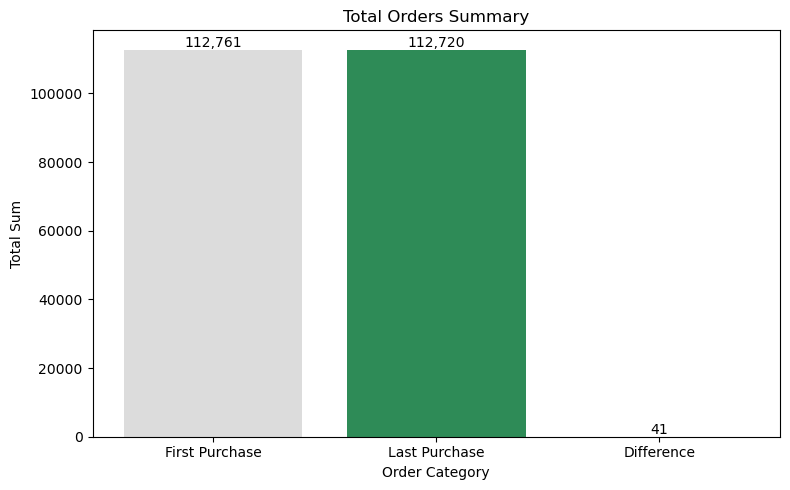

In [73]:
# Calculate the total sum for each column
# Kalkulasi dulu total sum value dari kolom total_orders_on_first_purchase, total_orders_on_last_purchase dan first_vs_last_purchase_difference
totals = {
    'First Purchase': customer_purchase_summary['total_orders_on_first_purchase'].sum(),
    'Last Purchase': customer_purchase_summary['total_orders_on_last_purchase'].sum(),
    'Difference': customer_purchase_summary['first_vs_last_purchase_difference'].sum()
}

# Buat visualisasi
plt.figure(figsize=(8, 5))
bars = plt.bar(totals.keys(), totals.values(), color=['gainsboro', 'seagreen', 'green'])

# Menambahkan total sum ke tiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Total Orders Summary')
plt.xlabel('Order Category')
plt.ylabel('Total Sum')
plt.tight_layout()
plt.show()


### Insight & Suggestion/Recommendation from Frequency of Customer Orders

Insight:  
- Hampir semua customer bertransaksi dengan jumlah item yang sama antara transaksi pertamanya dan transaksi terakhirnya
- Hanya beberapa customer saja yang jumlah transaksi terakhirnya melebihi jumlah transaksi pertamanya (refer to 41 difference)
- Mengacu dari data sebelumnya yang menyatakan banyak frekuensi customer yang berbelanja kurang dari 5 kali, lalu digabungkan dengan insight dari chart Total Orders Summary, maka ada indikasi banyaknya “Single-Transaction Customers” yang menyebabkan sum value first purchase dan last purchase tidak jauh berbeda.
- Dilihat dari perspective lain, ada peluang besar untuk meningkatkan GMV bila OLIST bisa meningkatkan kemampuan customer retentionnya dan membuat “Single-Transaction Customers” berbelanja lebih dari 1 kali.

Suggestion/Recommendation:  
- Menganalisis kembali apakah ada hubungan frekuensi transaksi dengan total order per customer
- Meningkatkan jumlah item per transaksi yang dilakukan customer dengan cara:
    - Melakukan promosi bundling dengan tawaran diskon yang lebih tinggi bila customer membeli lebih dari 1 produk. Contohnya buy 2 get 1, buy 3 get 1 atau promo sejenis lainnya.
    - Melakukan promosi cross-selling category dengan menawarkan promosi diskon ke customer bila mereka membeli complimentary product untuk barang yang mau atau telah mereka beli.

In [75]:
# customer_purchase_summary.to_csv("customer_purchase_summary.csv", index=False)

## 5. Conclusions from data exploratory.
- Top 3 customers per states inline dengan data populasi Brazil di tahun 2022 dengan 3 state paling tinggi jumlah penduduknya adalah São Paulo, Minas Gerais dan Rio de Janeiro.

- Top 3 customers per city juga inline dengan top 3 states (top 3 city = capital city dari top 3 states)

- Kesamaan dari 3 state terbawah (Acre, Amapa, Roraima) merupakan daerah yang sangat jauh dari Sao Paulo, jaraknya bisa sampai 4000an km. Ini menandakan kendala 3 state tersebut menjadi 3 terbawah adalah karena jarak. 
Sedangkan Top 20 Cities adalah kota-kota yang masih disekitaran Sao paulo dengan jarak hanya sekitar 120an km. 

- Bahwa frekuensi customer berbelanja di Ecommerce OLIST sangat kecil. Sebanyak 94rb an customers bertransaksi di bawah 5x dan hanya 19 customer yang bertransaksi lebih dari 5x selama 2016-09-04 sampai 2018-09-03. Artinya churn rate OLIST sangatlah tinggi dan kemampuan OLIST untuk mempertahankan customer baru untuk tetap berbelanja lewat mereka sangatlah lemah.

- Kemungkinan lain yang saya pikir menjadi alasan kenapa bisa terjadi churn rate tinggi adalah OLIST memperbolehkan transaksi tanpa customer harus mendaftar atau membuat akun terlebih dahulu, sehingga customer_unique_id akan terus bertambah setiap ada customer bertransaksi biarpun customer tersebut bukan customer baru.

- Hampir semua customer bertransaksi dengan jumlah item yang sama antara transaksi pertamanya dan transaksi terakhirnya

- Hanya beberapa customer saja yang jumlah transaksi terakhirnya melebihi jumlah transaksi pertamanya (refer to 41 difference)

- Mengacu dari data sebelumnya yang menyatakan banyak frekuensi customer yang berbelanja kurang dari 5 kali, maka ada indikasi banyaknya “Single-Transaction Customers” yang menyebabkan sum value first purchase dan last purchase tidak jauh berbeda.

- Dilihat dari perspective lain, ada peluang besar untuk meningkatkan GMV bila OLIST bisa meningkatkan kemampuan customer retentionnya dan membuat “Single-Transaction Customers” berbelanja lebih dari 1 kali.

# STEP 7: Order Behaviour
1.	Create a grouping table that calculates the average number of items ordered each based on total customers (customer_unique_id), then create a column that describes the frequency of orders for each customer (assuming = if below equals 5 it is called a little, otherwise it is a lot)
2.	Create a grouping table that calculates average item weight and standard deviation of item weight
3.	Create a grouping table that calculates the most frequent order times by month and day, and its time (morning, evening, or night)
4.	Create a grouping table that calculates the average total order value per order and classifies the average order price for each customer with the assumption that prices above 2500 are called expensive, prices between 1000 - 2500 are called normal, prices below 1000 are called cheap
5.	Create a grouping table that calculates the most popular payment methods and the preference of each customer's product category
6.	What are the most ordered categories each year and how are the categories developing each year? 


### 1. Create a grouping table that calculates the average number of items ordered each based on total customers (customer_unique_id), then create a column that describes the frequency of orders for each customer (assuming = if below equals 5 it is called a little, otherwise it is a lot)

In [79]:
# Pertama, untuk menghitung average number of items dari tiap customer, saya menggunakan tabel total_orders yang ada di total_customer_orders
# Karena kolom total_orders di total_customer_orders sudah menghitung number of items per customer, maka saya tinggal menghitung mean dari tabel tsb 
total_customer_orders = df.groupby('customer_unique_id').agg(total_orders=('order_id', 'count')).reset_index()
average_customer_orders = total_customer_orders.groupby('customer_unique_id').agg(avg_item_ordered=('total_orders', 'mean')).reset_index()

# Kedua buat define function untuk melabeli hasil average number of items, yang di bawah 5 as 'a little', else 'a lot'
def average_per_order(avg_item_ordered):
    if avg_item_ordered < 5:
        return 'a little'
    else:
        return 'a lot'

# Ketiga tambahin kolom 'order_frequency' 
# yang isinya mengapply function average_per_order ke kolom avg_item_ordered yang ada di tabel total_customer_order
average_customer_orders['order_frequency'] = average_customer_orders['avg_item_ordered'].apply(average_per_order)

average_customer_orders

,customer_unique_id,avg_item_ordered,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,a little
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,a little
2,0000f46a3911fa3c0805444483337064,1.0,a little
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,a little
4,0004aac84e0df4da2b147fca70cf8255,1.0,a little
...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,2.0,a little
94252,fffea47cd6d3cc0a88bd621562a9d061,1.0,a little
94253,ffff371b4d645b6ecea244b27531430a,1.0,a little
94254,ffff5962728ec6157033ef9805bacc48,1.0,a little


In [80]:
average_customer_orders['order_frequency'].value_counts()

order_frequency
a little    93367
a lot         889
Name: count, dtype: int64

C:\Users\benny\AppData\Local\Temp\ipykernel_4296\1419738426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=average_customer_orders, x='order_frequency', palette="viridis")


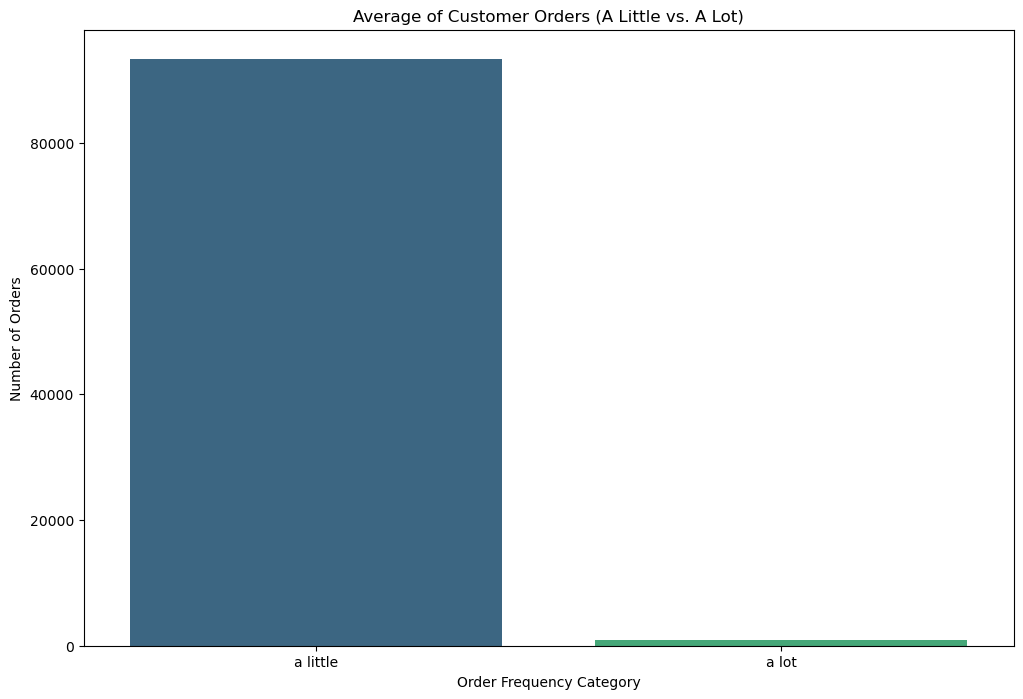

In [81]:
# Visualization
plt.figure(figsize=(12, 8))
sns.countplot(data=average_customer_orders, x='order_frequency', palette="viridis")
plt.title("Average of Customer Orders (A Little vs. A Lot)")
plt.xlabel("Order Frequency Category")
plt.ylabel("Number of Orders")
plt.show()

### Insight & Suggestion/Recommendation from Frequency of Customer Orders

Insight:  
- Rata-rata customer bertransaksi di OLIST di bawah 5 item.
- Ada potensi peningkatan GMV, sama seperti problem frekuensi transaksi.
- Analisis ini menjawab pertanyaan dari slide sebelumnya, yaitu BENAR ada hubungan antara frekuensi dan rata-rata transaksi dilihat dari chart yang bentuknya mirip. 
- __Analisis rata-rata item per customer transaction ini menambah keyakinan kalau problem yang dihadapi OLIST adalah banyaknya “Single-Transaction Customer”.__   

Suggestion/Recommendation:  
- Menyelediki lebih dalam kedua problem di atas, dimulai dari internal dengan cara:
    - Mereview kembali strategi marketing dan sales yang dijalankan
    - Menjalankan QA/QC untuk website OLIST demi memastikan tidak ada permasalahan di saat customer melakukan transaksi lebih dari 1 item atau saat mereka mau melakukan transaksi kembali di waktu berbeda.
- Melakukan investigasi eksternal juga dengan cara memberikan kuesioner atau mengerahkan tim Customer Service untuk mendapatkan insight dari para customer soal kendala mereka saat berbelanja di platfor OLIST

### 2. Create a grouping table that calculates average item weight and standard deviation of item weight

In [84]:
# Grouping table: Average and standard deviation of item weights
item_weight_stats = df.groupby('product_id').agg(
    avg_item_weight=('product_weight_g', 'mean'), # mengkalkulasi mean (average) dari kolom product_weight_g untuk tiap product_id
    std_item_weight=('product_weight_g', 'std'), # mengkalkulasi standard deviation dari kolom product_weight_g untuk tiap product_id
).reset_index()

item_weight_stats

,product_id,avg_item_weight,std_item_weight
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,NaN
1,00088930e925c41fd95ebfe695fd2655,1225.0,NaN
2,0009406fd7479715e4bef61dd91f2462,300.0,NaN
3,000b8f95fcb9e0096488278317764d19,550.0,0.0
4,000d9be29b5207b54e86aa1b1ac54872,250.0,NaN
...,...,...,...
32675,fff6177642830a9a94a0f2cba5e476d1,1400.0,0.0
32676,fff81cc3158d2725c0655ab9ba0f712c,58.0,NaN
32677,fff9553ac224cec9d15d49f5a263411f,150.0,NaN
32678,fffdb2d0ec8d6a61f0a0a0db3f25b441,150.0,0.0


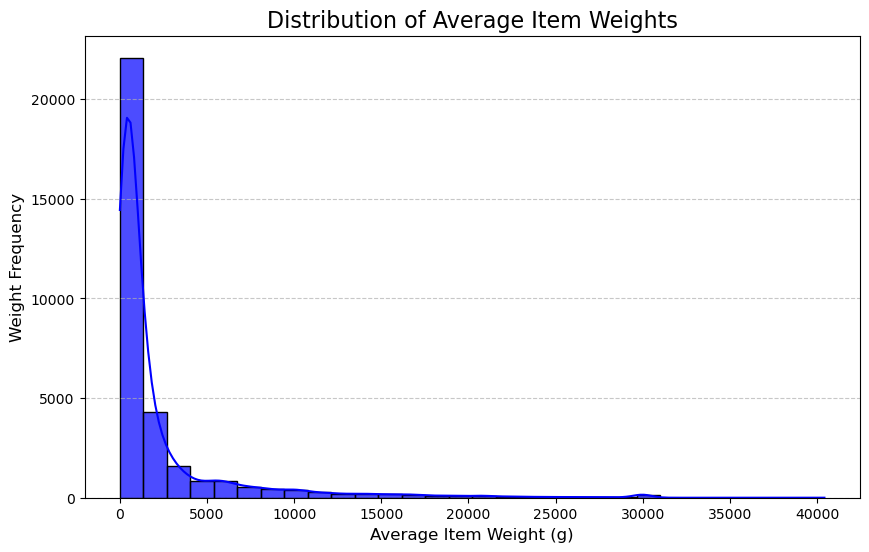

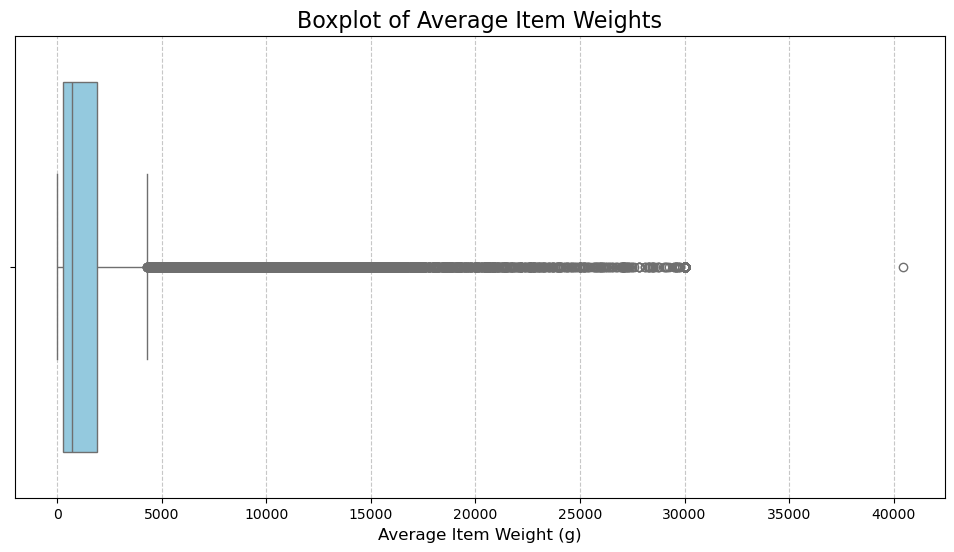

In [85]:
# Histogram untuk melihat rata-rata berat dari keseluruhan transaksi
plt.figure(figsize=(10, 6))
sns.histplot(item_weight_stats['avg_item_weight'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Average Item Weights', fontsize=16)
plt.xlabel('Average Item Weight (g)', fontsize=12)
plt.ylabel('Weight Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# PBoxplot untuk memvisualisasikan penyebaran dari average item weights
plt.figure(figsize=(12, 6))
sns.boxplot(x=item_weight_stats['avg_item_weight'], color='skyblue')
plt.title('Boxplot of Average Item Weights', fontsize=16)
plt.xlabel('Average Item Weight (g)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [86]:
item_weight_stats.head()

,product_id,avg_item_weight,std_item_weight
0,00066f42aeeb9f3007548bb9d3f33c38,300.0,NaN
1,00088930e925c41fd95ebfe695fd2655,1225.0,NaN
2,0009406fd7479715e4bef61dd91f2462,300.0,NaN
3,000b8f95fcb9e0096488278317764d19,550.0,0.0
4,000d9be29b5207b54e86aa1b1ac54872,250.0,NaN


### Insight & Suggestion/Recommendation from Distribution and Boxplot of Average Item Weights
Insight:  
- Dilihat dari histogram bisa disimpulkan kalau rata-rata gramasi semua transaksi ada di kisaran 1000-2000 gram dan biarpun jarang, ada transaksi yang gramasinya sampai 30.000 gram. 
- Dilihat area boxplot yang sempit menandakan tidak banyak keberagaman data gramasi atau dalam kata lain gramasi transaksi semua customer kebanyakan beratnya sama.
- Transaksi dengan gramasi rendah bisa mengindikasikan nilai transaksi rendah juga, terutama di beberapa kategori seperti FMCG. Butuh pendalaman data lagi untuk menentukan apakah transaksi yang bergramasi rendah ini disertai dengan nilai transaksi yang rendah juga. Karena bila gramasi rendah diikuti oleh nilai transaksi yang rendah artinya perlu ada perbaikan untuk meningkatkan gramasi transaksi dan nilai transaksi.
- Dari analisis frekuensi transaksi, rata-rata item per transaksi dan rata-rata gramasi per transaksi menimbulkan indikasi kalau value transaksi per customer juga rendah, yang bisa mempengaruhi ABSnya juga menjadi rendah.
- 
Suggestion/Recommendation:  
- Beberapa suggestion untuk meningkatkan value transaksi:
    - Diversifikasi produk dengan menjual variasi barang yang sama tapi dengan gramasi yang lebih berat.
    - Diversifikasi produk dengan menjual variasi barang premium yang harganya lebih mahal dibanding varian standar.
    - Tawarkan promo lebih tinggi bila customer berbelanja bundling seperti buy 2 get 1.

In [88]:
item_weight_stats['avg_item_weight'].value_counts().head(30)

avg_item_weight
200.0     2062
300.0     1547
150.0     1250
400.0     1196
100.0     1177
500.0     1103
250.0      997
600.0      949
350.0      826
700.0      740
800.0      619
450.0      612
550.0      548
900.0      542
1000.0     505
650.0      412
1200.0     397
1100.0     389
850.0      354
1500.0     339
1400.0     338
750.0      324
50.0       311
1300.0     299
1600.0     256
950.0      245
1050.0     240
2000.0     226
1150.0     225
1250.0     223
Name: count, dtype: int64

### 3. Create a grouping table that calculates the most frequent order times by month and day, and its time (morning, evening, or night)

In [90]:
order_time_stats = df.groupby(['year', 'month', 'day_name', 'time_period']).size().reset_index(name='frequency')
most_frequent_times = order_time_stats.loc[
    order_time_stats.groupby(['year', 'month', 'day_name'])['frequency'].idxmax()
]

most_frequent_times

,year,month,day_name,time_period,frequency
0,2016,9,Monday,Night,1
1,2016,9,Sunday,Night,2
4,2016,10,Friday,Morning,19
6,2016,10,Monday,Afternoon,22
12,2016,10,Saturday,Morning,14
...,...,...,...,...,...
575,2018,8,Sunday,Evening,265
578,2018,8,Thursday,Afternoon,466
582,2018,8,Tuesday,Afternoon,321
586,2018,8,Wednesday,Afternoon,411


### most frequent order times by month

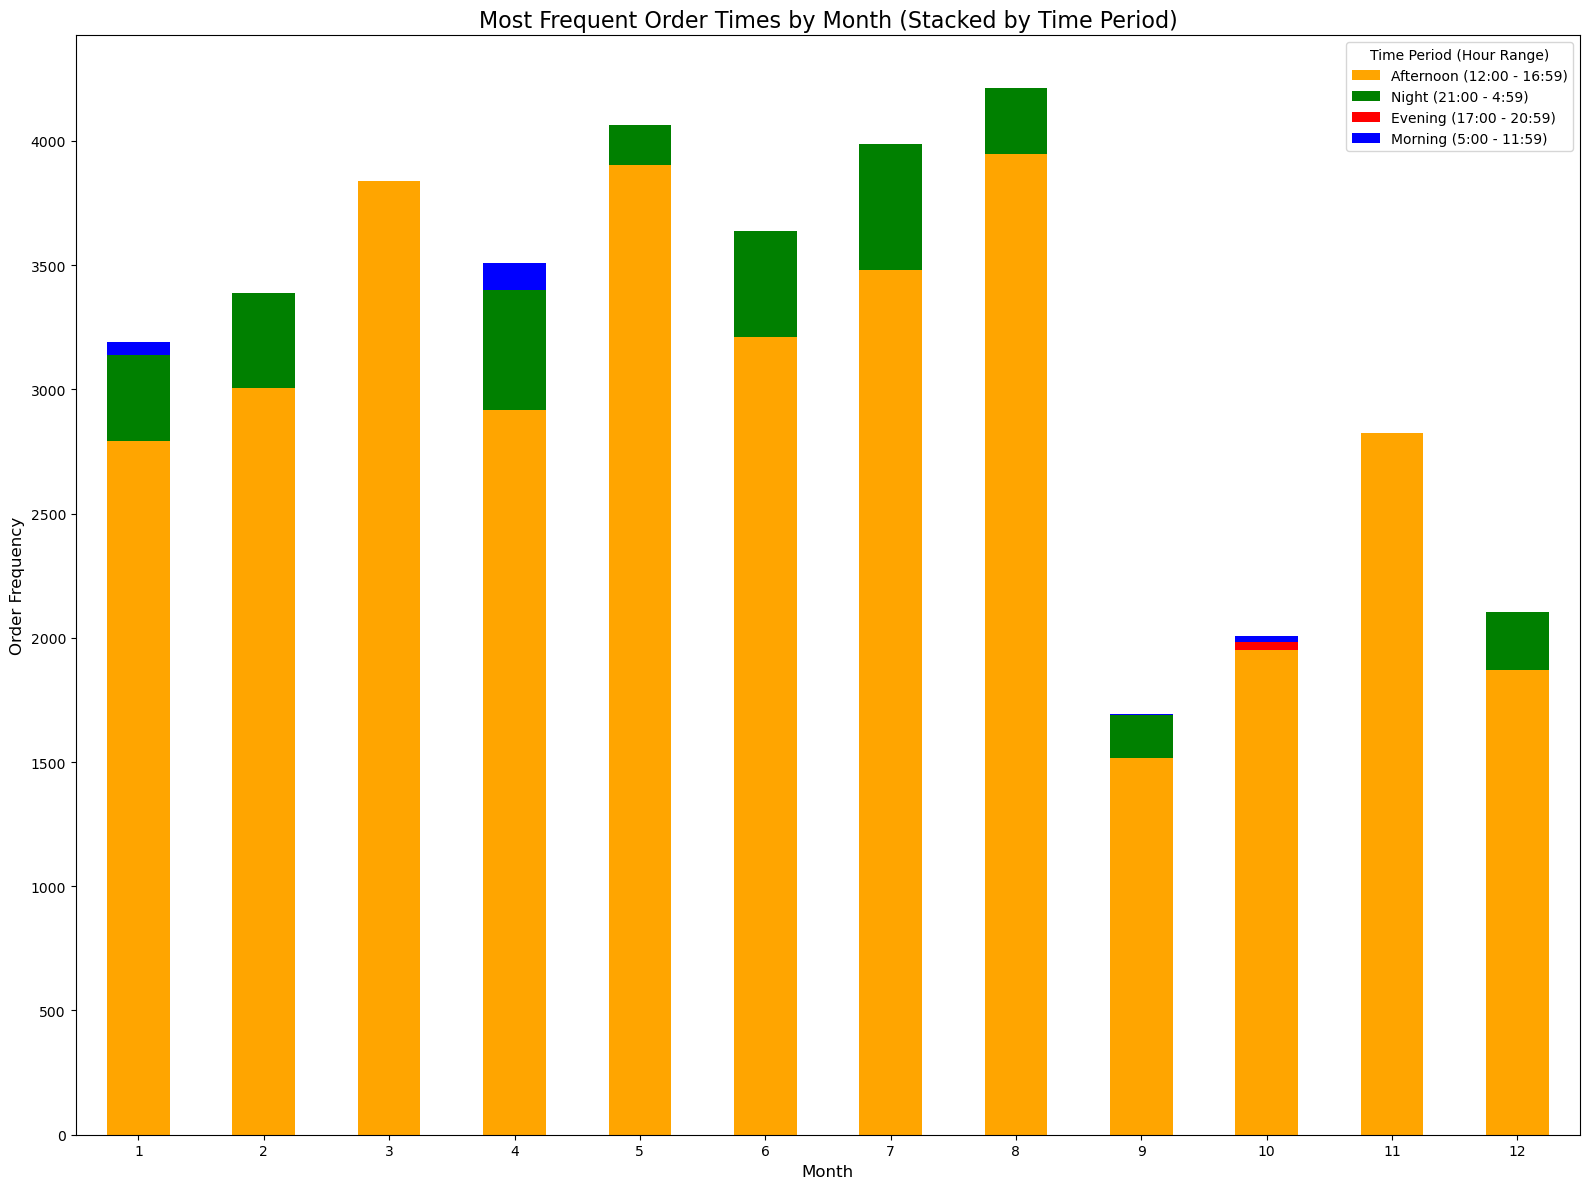

In [92]:
# Mempivot tabel most_frequent_times agar datanya bisa digunakan untuk stacked barplot
stacked_data = most_frequent_times.pivot_table(
    index='month',
    columns='time_period',
    values='frequency',
    aggfunc='sum'
)

# Menentukan warna tiap barplot
custom_colors = {
    'Afternoon': 'orange',
    'Night': 'blue',
    'Evening': 'green',
    'Morning': 'red'
}

# Mapping variabel custom_colors ke stacked bar chart
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 12),
    color=[custom_colors[col] for col in stacked_data.columns]
)

# Memberikan judul chart + nama sumbu X dan Y
plt.title("Most Frequent Order Times by Month (Stacked by Time Period)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Order Frequency", fontsize=12)

# Mengcostumize legend chart agar time period bisa dibaca lebih mudah
plt.legend(
    title="Time Period (Hour Range)",
    labels=[
        'Afternoon (12:00 - 16:59)',
        'Night (21:00 - 4:59)',
        'Evening (17:00 - 20:59)',
        'Morning (5:00 - 11:59)'
    ],
    loc='upper right',
    fontsize=10
)

# Mengatur rotasi sumbu x
plt.xticks(rotation=0)

# Mengatur tata letak semua elemen yang ada di dalam chart agar tidak saling bertumpuk
plt.tight_layout()

# Memanggil plot yang sudah dibuat
plt.show()

### Insight & Suggestion/Recommendation from Most Frequent Order Time bt Month
Insight:   
- Dilihat dari data bisa disimpulkan kalau customer behavior OLIST bertransaksi di jam 12 siang sampai jam 5 sore (Afternoon)
- Jam transaksi terbanyak kedua adalah jam 5 sore sampai 9 malam (Evening)
- Di bulan Maret dan November didominasi transaksi di jam 12.00 – 17.00 (Afternoon)

Suggestion/Recommendation:  
- Yang bisa didapat dari data insight di atas adalah panduan waktu untuk menjalankan campaign atau program promosi agar bisa memaksimalkan peningkatan jumlah transaksi. Dan acuan waktu yang tepat tersebut adalah di jam 12.00 – 17.00.

### Most frequent order times by day

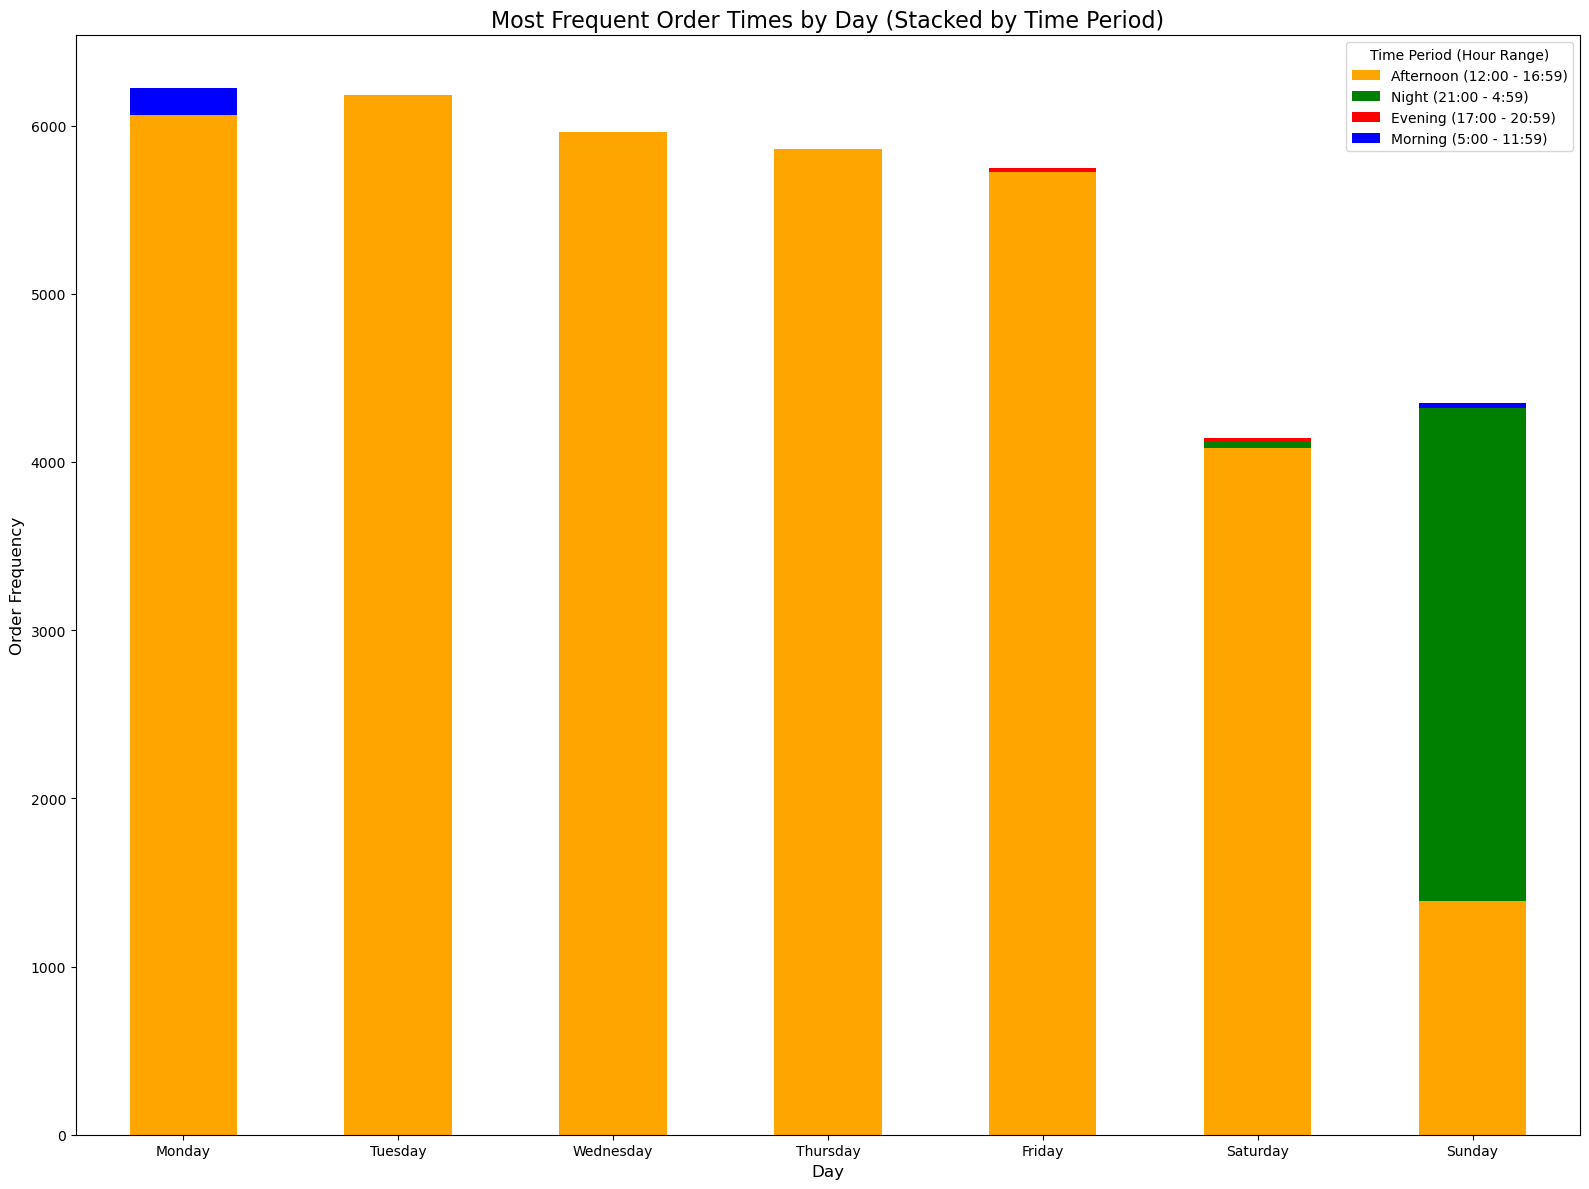

In [95]:
# Pivoting tabel most_frequent_times agar datanya bisa digunakan untuk stacked barplot
stacked_data = most_frequent_times.pivot_table(
    index='day_name',
    columns='time_period',
    values='frequency',
    aggfunc='sum'
)


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
stacked_data = stacked_data.reindex(day_order)

# Menentukan warna tiap barplot
custom_colors = {
    'Afternoon': 'orange',
    'Night': 'blue',
    'Evening': 'green',
    'Morning': 'red'
}

# Mapping variabel custom_colors ke stacked bar chart
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(16, 12),
    color=[custom_colors[col] for col in stacked_data.columns]
)

# Memberikan judul chart + nama sumbu X dan Y
plt.title("Most Frequent Order Times by Day (Stacked by Time Period)", fontsize=16)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Order Frequency", fontsize=12)

# Mengcostumize legend chart agar time period bisa dibaca lebih mudah
plt.legend(
    title="Time Period (Hour Range)",
    labels=[
        'Afternoon (12:00 - 16:59)',
        'Night (21:00 - 4:59)',
        'Evening (17:00 - 20:59)',
        'Morning (5:00 - 11:59)'
    ],
    loc='upper right',
    fontsize=10
)

# Mengatur rotasi sumbu x
plt.xticks(rotation=0)

# Mengatur tata letak semua elemen yang ada di dalam chart agar tidak saling bertumpuk
plt.tight_layout()

# Memanggil plot yang sudah dibuat
plt.show()

### Insight & Suggestion/Recommendation from Most Frequent Order Time by Day
Insight:   
- Chart frekuensi transaksi berdasarkan hari juga menunjukkan kalau transaksi paling banyak terjadi di jam 12-00 – 17.00
- Ada perubahan behaviour transaksi di hari Minggu, dimana lebih banyak orang yang bertransaksi di malam hari (17.00 – 21.00) dibanding siang hari. Kemungkinan perubahan ini terjadi karena warga Brazil yang mayoritas beragama Katolik dan Kristen melakukan ibadah di pagi sampai sore hari setiap hari Minggu, sehingga mereka baru bertransaksi si malam hari.
- Ada penurunan jumlah transaksi secara keseluruhan di weekend.  

Suggestion/Recommendation:  
- Yang didapat dari data insight di atas adalah panduan waktu dalam menjalankan campaign atau program promosi agar bisa memaksimalkan peningkatan jumlah transaksi adalah di jam 12.00 – 17.00 kecuali di hari Minggu promosi bisa dijalankan di malam hari jam 17.00 – 21.00.
- Untuk mengatasi penurunan jumlah transaksi di weekend, OLIST bisa menjalankan weekly campaign yang dilakukan setiap weekend supaya sedikit demi sedikit customer behaviour bisa terbentuk untuk berbelanja di weekend.

### 4. Create a grouping table that calculates the average total order value per order and classifies the average order price for each customer with the assumption that prices above 2500 are called expensive, prices between 1000 - 2500 are called normal, prices below 1000 are called cheap

In [98]:
# Pertama grouping data berdasarkan customer_unique_id lalu diagregasi kolom total_order_value nya untuk mencari rata-rata dari tiap customer_unique_id
customer_order_value_stats = df.groupby('customer_unique_id').agg(avg_order_value=('total_order_value', 'mean')).reset_index()

# Kedua buat define function untuk melabeli total_order_value (above 2500 are called expensive, prices between 1000 - 2500 are called normal, prices below 1000 are called cheap)
def average_order_value(avg_order_value):
    if avg_order_value < 1000:
        return 'cheap'
    elif 1000 <= avg_order_value <= 2500:
        return 'normal'
    else:
        return 'expensive'

# Ketiga mengapply function yang mendefinisikan klasifikasi harga ke kolom avg_order_value di tabel customer_order_value_stats
customer_order_value_stats['price_classification'] = customer_order_value_stats['avg_order_value'].apply(average_order_value)

customer_order_value_stats

,customer_unique_id,avg_order_value,price_classification
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,cheap
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,cheap
2,0000f46a3911fa3c0805444483337064,86.22,cheap
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,cheap
4,0004aac84e0df4da2b147fca70cf8255,196.89,cheap
...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,1033.71,normal
94252,fffea47cd6d3cc0a88bd621562a9d061,84.58,cheap
94253,ffff371b4d645b6ecea244b27531430a,112.46,cheap
94254,ffff5962728ec6157033ef9805bacc48,133.69,cheap


C:\Users\benny\AppData\Local\Temp\ipykernel_4296\3032838603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=customer_order_value_stats, x='price_classification', palette="viridis")


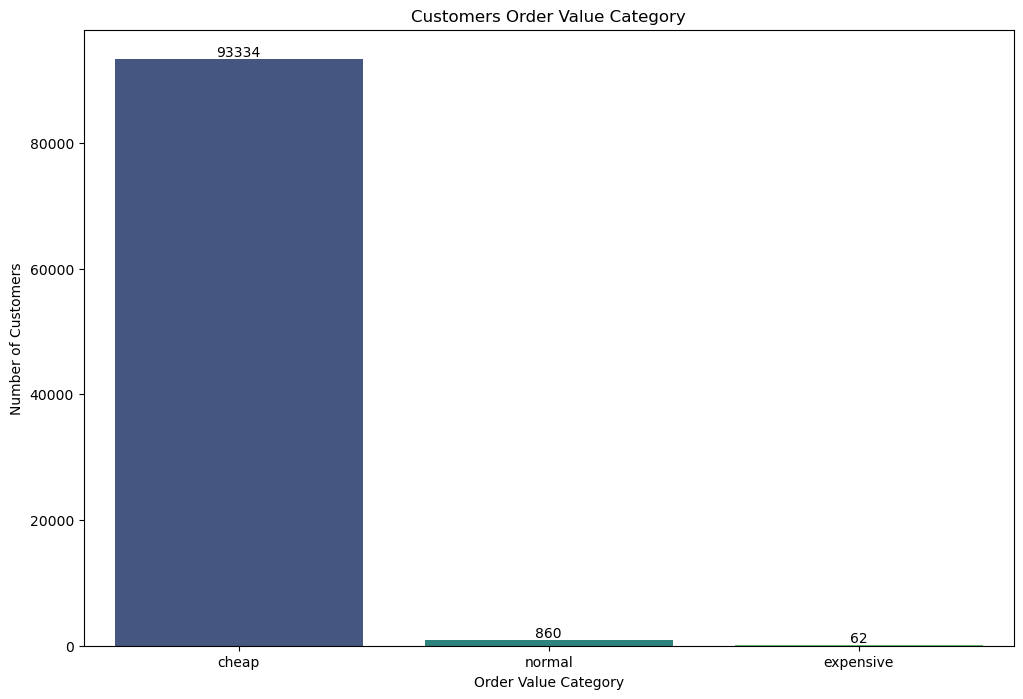

In [99]:
# Visualization
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=customer_order_value_stats, x='price_classification', palette="viridis")

# Menambahkan value counts tiap bar plot
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # posisi angka di tengah
        bar.get_height() + 5,  # posisi angka agak di atas
        int(bar.get_height()),  # value tiap kategori harga
        ha='center', va='bottom', fontsize=10  # Center alignment and smaller font size
    )

# Memberi judul + nama tiap axis
plt.title("Customers Order Value Category") # Judul chart
plt.xlabel("Order Value Category") # Nama sumbu X
plt.ylabel("Number of Customers") # Nama sumbu Y
# plt.savefig('Customers Order Value Category.png', dpi=300) 
plt.show()

In [100]:
customer_order_value_stats['price_classification'].value_counts()

price_classification
cheap        93334
normal         860
expensive       62
Name: count, dtype: int64

### Insight & Suggestion/Recommendation from Customer Order Value Category
Insight: 
- 99% customer OLIST melakukan transaksi yang masuk ke kategori cheap/murah.
- Tingginya jumlah customer yang berbelanja dengan value cheap/murah masih berkaitan erat dengan permasalahan “Single-Transaction Customer” yang berakibat rendahnya ABS.  

Suggestion/Recommendation:  
- Dengan problem yang sama artinya suggestion/recommendation yang bisa diberikan masih sama, yaitu:
1. Meningkatkan frekuensi customer berbelanja kembali, dengan cara :
    - Melakukan loyalty program, jadi makin sering customer berbelanja, makin banyak benefit dan promo yang bisa mereka dapat.
    - Melakukan blast email berisi promo-promo ke semua customer yang pernah mendaftarkan email mereka ke database OLIST.
2. Meningkatkan jumlah item per transaksi yang dilakukan customer, dengan cara:
    - Melakukan promosi bundling dengan tawaran diskon yang lebih tinggi bila customer membeli lebih dari 1 produk
    - Melakukan promosi cross-selling category dengan menawarkan customer produk kategori lain yang menjadi barang pelengkap untuk produk yang telah dia beli

### 5. Create a grouping table that calculates the most popular payment methods and the preference of each customer's product category

In [103]:
# Grouping data berdasarkan payment_typenya 
popular_payment_type = df.groupby('payment_type').size().reset_index(name='count')

# Mengurutkan payment type dari most popular ke least popular
popular_payment_type = popular_payment_type.sort_values(by='count', ascending=False)

# Display the most popular payment type table
popular_payment_type

,payment_type,count
1,credit_card,86071
0,boleto,22729
3,voucher,6262
2,debit_card,1688


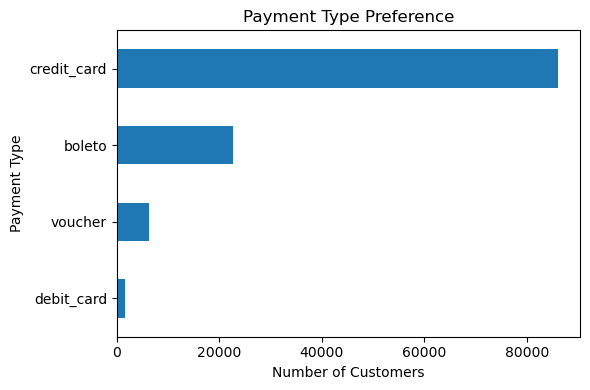

In [104]:
# Memvisualisasikan tabel popular_payment_type
top_payment_type = popular_payment_type.groupby('payment_type').agg({'count':'sum'}).sort_values('count', ascending=False).head(20)

top_payment_type.plot(kind='barh', figsize=(6, 4), legend=False)

plt.title('Payment Type Preference')
plt.xlabel('Number of Customers')
plt.ylabel('Payment Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [105]:
# Menghitung product category yang memiliki paling banyak transaksi dan mengurutkannya dari paling besar ke terkecil  
customer_category_preference = df.groupby('product_category_name').size().reset_index(name='count')
customer_category_preference = customer_category_preference.sort_values(by='count', ascending=False)

customer_category_preference

,product_category_name,count
14,cama_mesa_banho,11819
12,beleza_saude,9914
33,esporte_lazer,8925
55,moveis_decoracao,8723
45,informatica_acessorios,8075
...,...,...
47,la_cuisine,15
18,cds_dvds_musicais,14
61,pc_gamer,10
38,fashion_roupa_infanto_juvenil,8


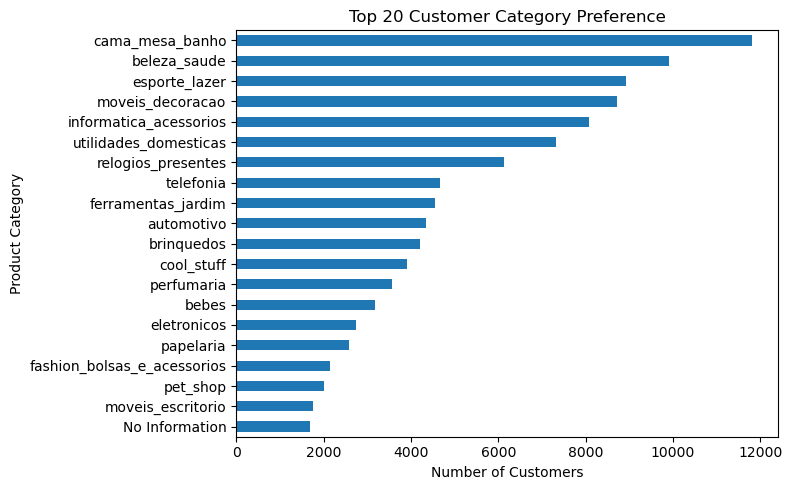

In [106]:
# Visualisasi Top 20 product category
top_20_category = customer_category_preference.groupby('product_category_name').agg({'count':'sum'}).sort_values('count', ascending=False).head(20)

top_20_category.plot(kind='barh', figsize=(8, 5), legend=False)

plt.title('Top 20 Customer Category Preference')
plt.xlabel('Number of Customers')
plt.ylabel('Product Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [107]:
# Menggabungkan tabel'Top 20 Product Category' dan payment type untuk mencari preferensi tipe pembayaan di top 20 product category

category_payment_preference = df.groupby(['product_category_name', 'payment_type']).size().reset_index(name='type_count')

# Mengurutkan payment type paling populer di tiap top 20 prouct category
category_payment_preference = category_payment_preference.sort_values(
    by=['product_category_name', 'type_count'], ascending=[True, False]
)

category_payment_preference

,product_category_name,payment_type,type_count
1,No Information,credit_card,1224
0,No Information,boleto,316
3,No Information,voucher,119
2,No Information,debit_card,29
5,agro_industria_e_comercio,credit_card,145
...,...,...,...
268,telefonia_fixa,debit_card,3
271,utilidades_domesticas,credit_card,5382
270,utilidades_domesticas,boleto,1314
273,utilidades_domesticas,voucher,502


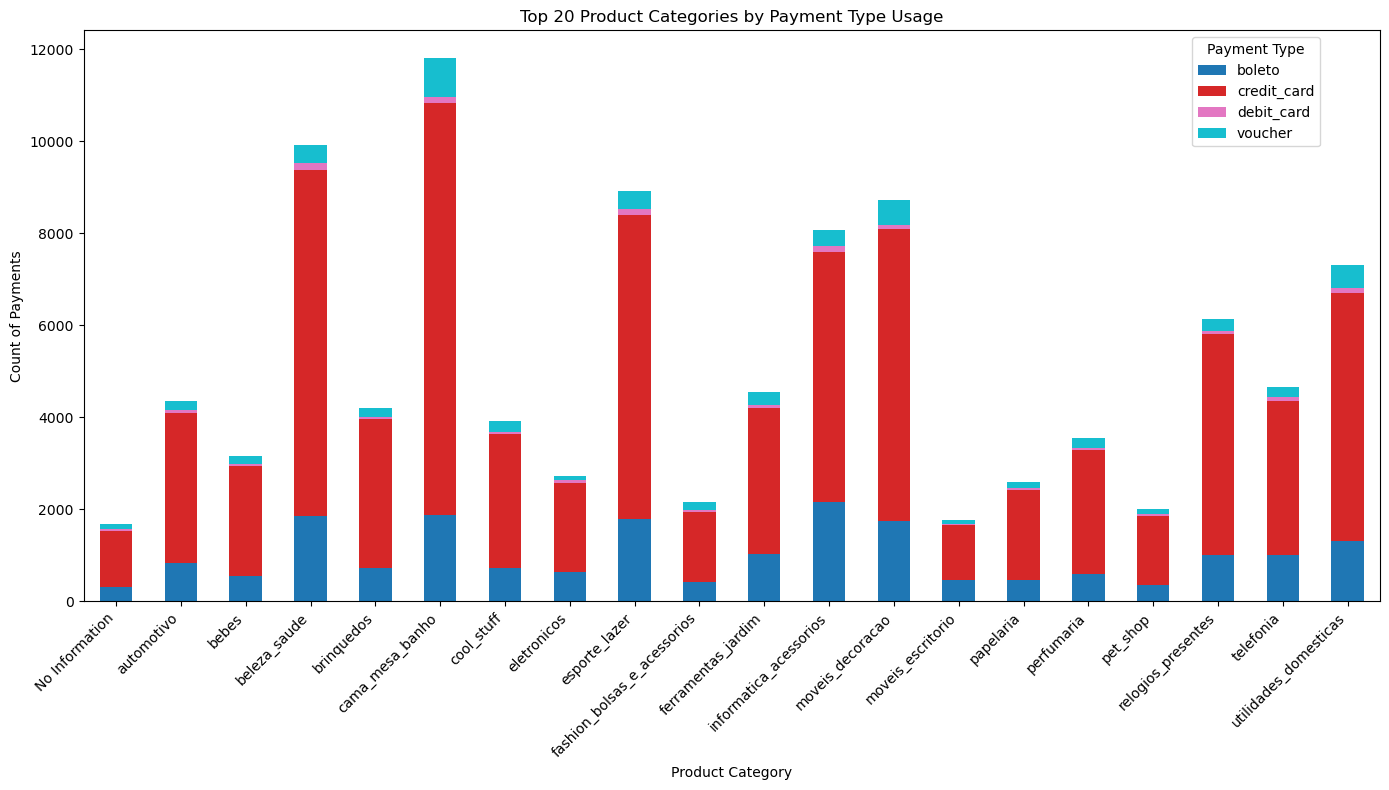

In [108]:
# Memilih top 20 product category
top_20_category = category_payment_preference.groupby('product_category_name').agg({'type_count': 'sum'}).sort_values('type_count', ascending=False).head(20).index

filtered_data = category_payment_preference[category_payment_preference['product_category_name'].isin(top_20_category)]

# Mempivot data untuk dimasukkan ke stacked bar chart
pivot_table = filtered_data.pivot(index='product_category_name', columns='payment_type', values='type_count').fillna(0)

# Plot untuk stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Top 20 Product Categories by Payment Type Usage')
plt.xlabel('Product Category')
plt.ylabel('Count of Payments')
plt.legend(title='Payment Type', bbox_to_anchor=(0.85, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insight & Suggestion/Recommendation from Top 20 Product Categories by Payment Type Usage
Insight:  
- Dapat disimpulkan payment type paling popular yang digunakan oleh customer OLIST adalah menggunakan credit_card
- Bahkan di top 20 product category, pembayaran transaksi didominasi oleh pembayaran lewat credit card.  

Suggestion/Recommendation:
- Insight yang didapat bisa menjadi acuan bagi tim Marketing OLIST dalam membuat promo yang difokuskan untuk pembayaran lewat credit card. Contoh: promo voucher diskon untuk customer yang berbelanja menggunakan credit card Bank A.
- OLIST juga bisa menganalisa data credit card lebih dalam lagi untuk mencari tahu credit card dari bank mana yang paling banyak digunakan oleh customer. Data credit card bank yang paling banyak digunakan ini bisa dijadikan bargaining tools bagi tim Business Development untuk bekerja sama dengan bank-bank yang credit cardnya banyak digunakan customer OLIST untuk berbelanja.

### 6. What are the most ordered categories each year and how are the categories developing each year? 

### a. Visualisasi pertama untuk top 20 category setiap tahunnya. Posisi bisa berubah-ubah sesuai berapa banyak transaksi per category.   

In [112]:
# Menghitung top 20 category untuk tahun 2016, 2017 dan 2018 dengan for loop
top_categories_by_year = {}
for year in [2016, 2017, 2018]:
    top_categories_by_year[year] = (
        df[df['year'] == year]
        .groupby('product_category_name')
        .size()
        .reset_index(name='order_count')
        .sort_values('order_count', ascending=False)
        .head(20)
    )

# Menggabungkan hasil dari iterasi
top_categories_combined = pd.concat(
    [top_categories_by_year[year].assign(year=year) for year in top_categories_by_year], axis=0
)

top_categories_combined

,product_category_name,order_count,year
24,moveis_decoracao,80,2016
5,beleza_saude,48,2016
26,perfumaria,36,2016
6,brinquedos,25,2016
20,informatica_acessorios,24,2016
12,esporte_lazer,19,2016
23,market_place,14,2016
4,bebes,14,2016
31,utilidades_domesticas,12,2016
3,automotivo,12,2016


C:\Users\benny\AppData\Local\Temp\ipykernel_4296\3161362889.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\benny\AppData\Local\Temp\ipykernel_4296\3161362889.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\benny\AppData\Local\Temp\ipykernel_4296\3161362889.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


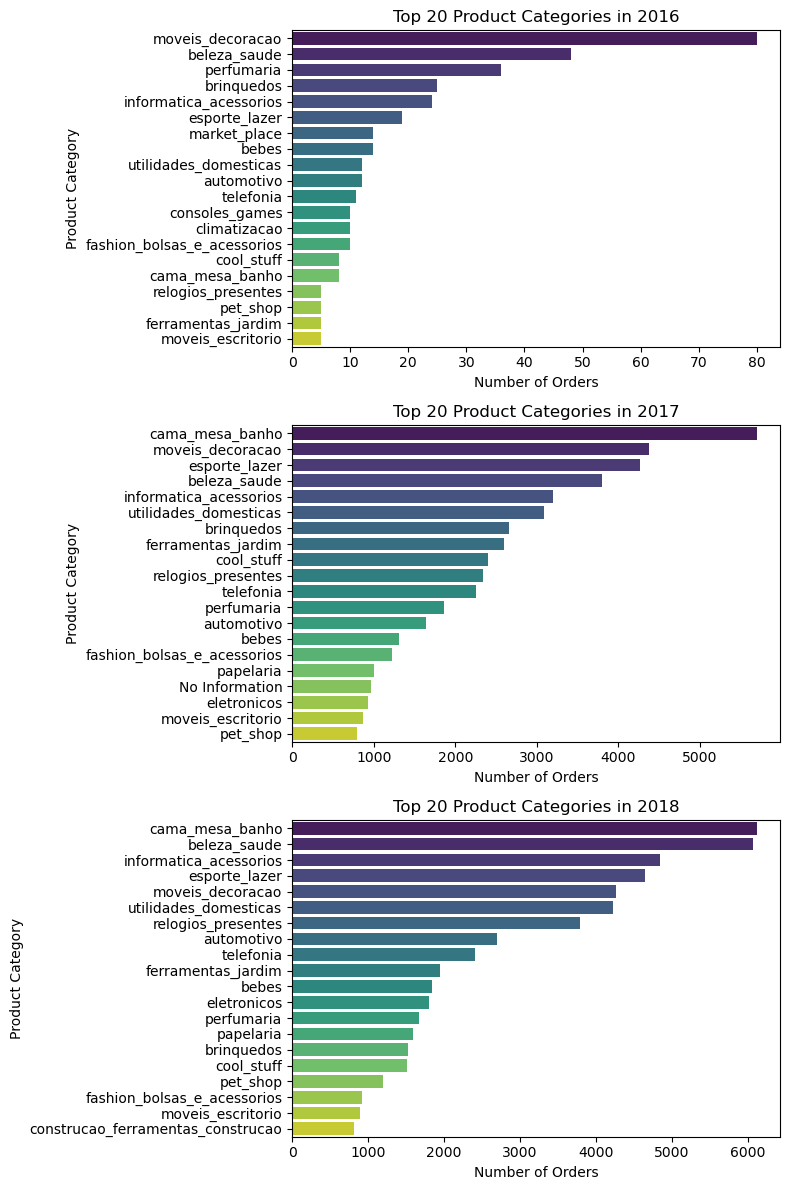

In [113]:
# Menghitung top 20 category untuk tahun 2016, 2017 dan 2018 dengan for loop
top_categories_by_year = {}
for year in [2016, 2017, 2018]:
    top_categories_by_year[year] = (
        df[df['year'] == year]
        .groupby('product_category_name')
        .size()
        .reset_index(name='order_count')
        .sort_values('order_count', ascending=False)
        .head(20)
    )

# Menggabungkan hasil dari iterasi
top_categories_combined = pd.concat(
    [top_categories_by_year[year].assign(year=year) for year in top_categories_by_year], axis=0
)

# Visualization
plt.figure(figsize=(8, 12))
for i, year in enumerate([2016, 2017, 2018], 1):
    plt.subplot(3, 1, i)
    sns.barplot(
        data=top_categories_by_year[year],
        x='order_count',
        y='product_category_name',
        palette='viridis'
    )
    plt.title(f'Top 20 Product Categories in {year}')
    plt.xlabel('Number of Orders')
    plt.ylabel('Product Category')

plt.tight_layout()
plt.show()

### Insight & Suggestion/Recommendation from Top 20 Product Categories by Payment Type Usage
Insight:   
- Product cama_mesa_banho, moveis_decoracao, beleza_saude dam informatica_acessorios sering masuk ke posisi Top 5 
- Total transaksi top 20 categories di tahun 2016 yang paling tinggi hanya berkisar 80 transaksi, berbanding jauh dengan tahun 2017 dan 2018 yang sampai 6000 an transaksi. Hal ini disebabkan data yang digunakan di tahun 2016 hanya sekitar 4 bulan, dari September 2016 sampai Desember 2016.

Suggestion/Recommendation:  
- Insight yang didapat bisa menjadi acuan bagi tim Marketing OLIST dalam membuat promo bundling atau cross-selling category, bisa menggunakan Top 20 Product Categories atau kalau mau lebih efektif  bisa menggunakan Top 5 Product Categories sebagai produk utama yang bisa dipasangkan dengan product category lain yang kurang penjualannya. 
- Top 20 Product Categories ini juga bisa menjadi acuan bagi tim Logistik dan tim Operasional OLIST untuk bekerja sama dengan seller yang menjual Top 20 Categories agar bisa selalu menjaga inventory level mereka, memastikan top 20 product categories selalu ada stocknya  dan customer selalu bisa berbelanja Top 20 Product Categories.
- Selain memastikan inventory level, tim Marketing dan tim Sales OLIST juga bisa bekerja sama dengan seller yang menjual Top 20 Categories ini untuk memasarkan Top 20 Product Categories lebih baik lagi. Caranya dengan seller bisa memberikan subsidi lebih untuk promosi barangnya dan tim OLIST bisa memberikan visibility paling baik di platform OLIST di mana banyak orang akan melihat Top 20 Product Categories tersebut.

### b. Visualisasi kedua untuk top 20 category sepanjang 2016-2018. Posisi top 20 tidak berubah, hanya menampilkan berapa banyak order yang terjadi tiap tahunnya untuk top 20 category sepanjang 2016-2018.  

C:\Users\benny\AppData\Local\Temp\ipykernel_4296\1263072591.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\benny\AppData\Local\Temp\ipykernel_4296\1263072591.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\benny\AppData\Local\Temp\ipykernel_4296\1263072591.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


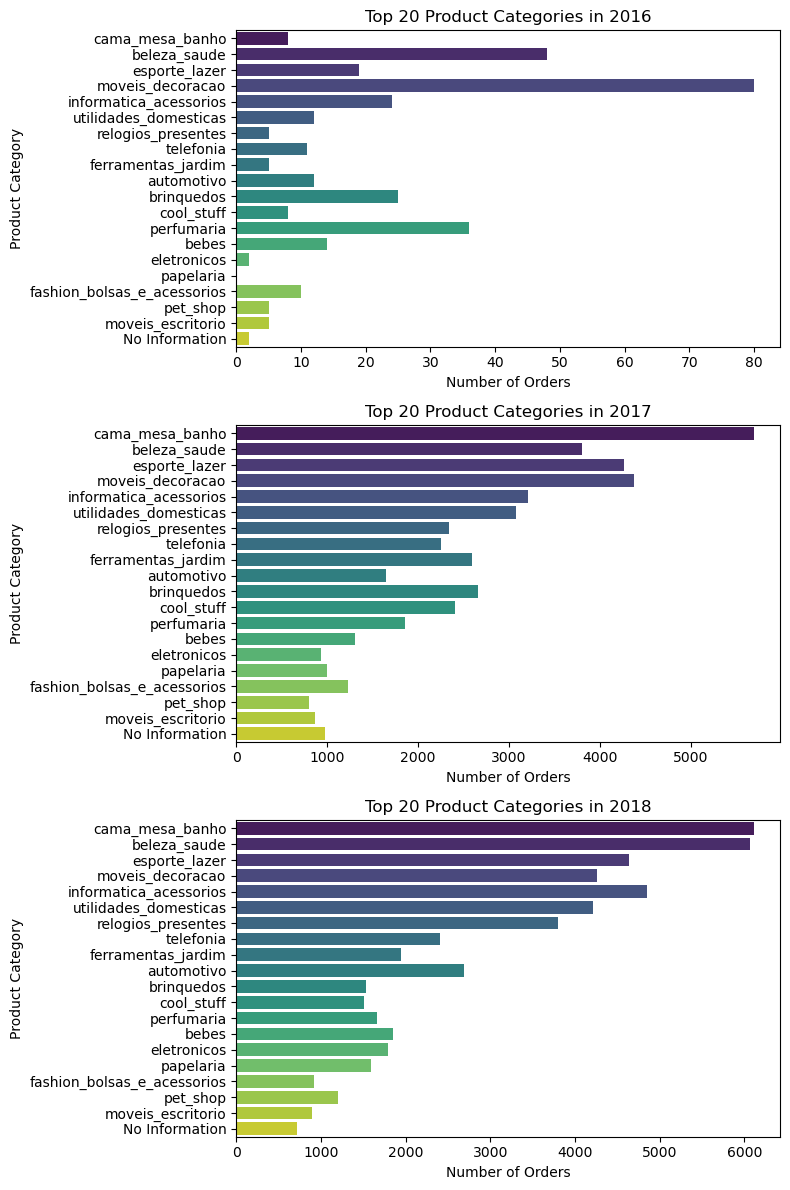

In [116]:
# Recalculate customer_category_preference based on dataset structure
customer_category_preference = df.groupby(['product_category_name', 'year']).size().reset_index(name='order_count')

# Filter top 20 categories based on all years
top_20_categories = customer_category_preference.groupby('product_category_name').agg({'order_count': 'sum'}).sort_values('order_count', ascending=False).head(20).index

# Filter data for top 20 categories
filtered_data = customer_category_preference[customer_category_preference['product_category_name'].isin(top_20_categories)]

# Separate data by year
data_2016 = filtered_data[filtered_data['year'] == 2016]
data_2017 = filtered_data[filtered_data['year'] == 2017]
data_2018 = filtered_data[filtered_data['year'] == 2018]

# Plotting
plt.figure(figsize=(8, 12))

for i, (data, year) in enumerate(zip([data_2016, data_2017, data_2018], [2016, 2017, 2018]), 1):
    plt.subplot(3, 1, i)
    sns.barplot(
        data=data,
        x='order_count',
        y='product_category_name',
        order=top_20_categories,
        palette='viridis'
    )
    plt.title(f'Top 20 Product Categories in {year}')
    plt.xlabel('Number of Orders')
    plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


# STEP 8: Review Customer  
1.	What is the average review score for each customer and create a column for the satisfaction level of each customer assuming a score of 4 & 5 is satisfied, otherwise not satisfied
2.	Select a customer who fills in the title and message review, then create a table to calculate the total reviews for each customer and combine it with the total order table to find information on the review ratio per transaction for each customer


### 1.	What is the average review score for each customer and create a column for the satisfaction level of each customer assuming a score of 4 & 5 is satisfied, otherwise not satisfied

In [119]:
# Pertama, untuk menghitung average number of items dari tiap customer, saya menggunakan tabel total_orders yang ada di total_customer_orders
# Karena kolom total_orders di total_customer_orders sudah menghitung number of items per customer, maka saya tinggal menghitung mean dari tabel tsb 
average_customer_review = df.groupby('customer_unique_id').agg(avg_cust_review =('review_score', 'mean')).reset_index()

# Kedua buat define function untuk melabeli hasil average number of items, yang di bawah 5 as 'a little', else 'a lot'
def review_score(avg_cust_review):
    if avg_cust_review < 4:
        return 'not satisfied'
    else:
        return 'satisfied'

# Ketiga tambahin kolom 'order_frequency' 
# yang isinya mengapply function average_per_order ke kolom avg_item_ordered yang ada di tabel total_customer_order
average_customer_review['customer_satisfaction'] = average_customer_review['avg_cust_review'].apply(review_score)

average_customer_review

,customer_unique_id,avg_cust_review,customer_satisfaction
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,satisfied
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,satisfied
2,0000f46a3911fa3c0805444483337064,3.0,not satisfied
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,satisfied
4,0004aac84e0df4da2b147fca70cf8255,5.0,satisfied
...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,satisfied
94252,fffea47cd6d3cc0a88bd621562a9d061,4.0,satisfied
94253,ffff371b4d645b6ecea244b27531430a,5.0,satisfied
94254,ffff5962728ec6157033ef9805bacc48,5.0,satisfied


C:\Users\benny\AppData\Local\Temp\ipykernel_4296\1364677298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=average_customer_review, x='customer_satisfaction', palette="viridis")


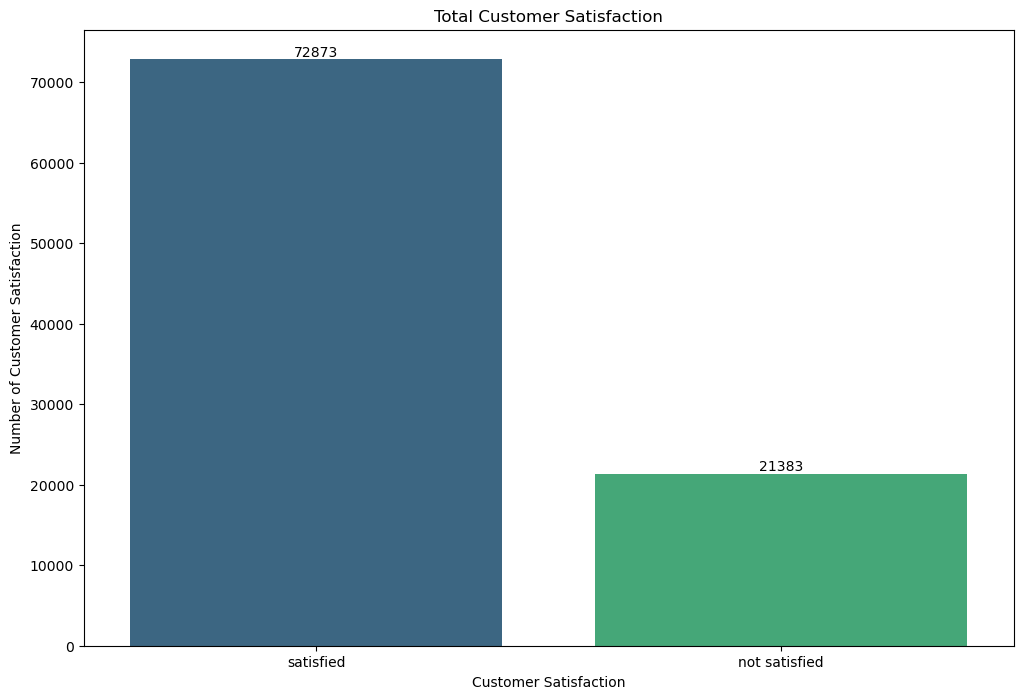

In [120]:
# Visualization
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=average_customer_review, x='customer_satisfaction', palette="viridis")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # posisi angka di tengah
        bar.get_height() + 5,  # posisi angka agak di atas
        int(bar.get_height()),  # value tiap kategori harga
        ha='center', va='bottom', fontsize=10  # Center alignment and smaller font size
    )
    
plt.title("Total Customer Satisfaction")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Number of Customer Satisfaction")
plt.show()

In [121]:
average_customer_review['customer_satisfaction'].value_counts()

customer_satisfaction
satisfied        72873
not satisfied    21383
Name: count, dtype: int64

### Berikut untuk visualisasi menggunakan persentase antara satisfied dan not satisfied

C:\Users\benny\AppData\Local\Temp\ipykernel_4296\4138255640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=average_customer_review, x='customer_satisfaction', palette="viridis")
C:\Users\benny\AppData\Local\Temp\ipykernel_4296\4138255640.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=average_customer_review['customer_satisfaction'].value_counts()[index],
C:\Users\benny\AppData\Local\Temp\ipykernel_4296\4138255640.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

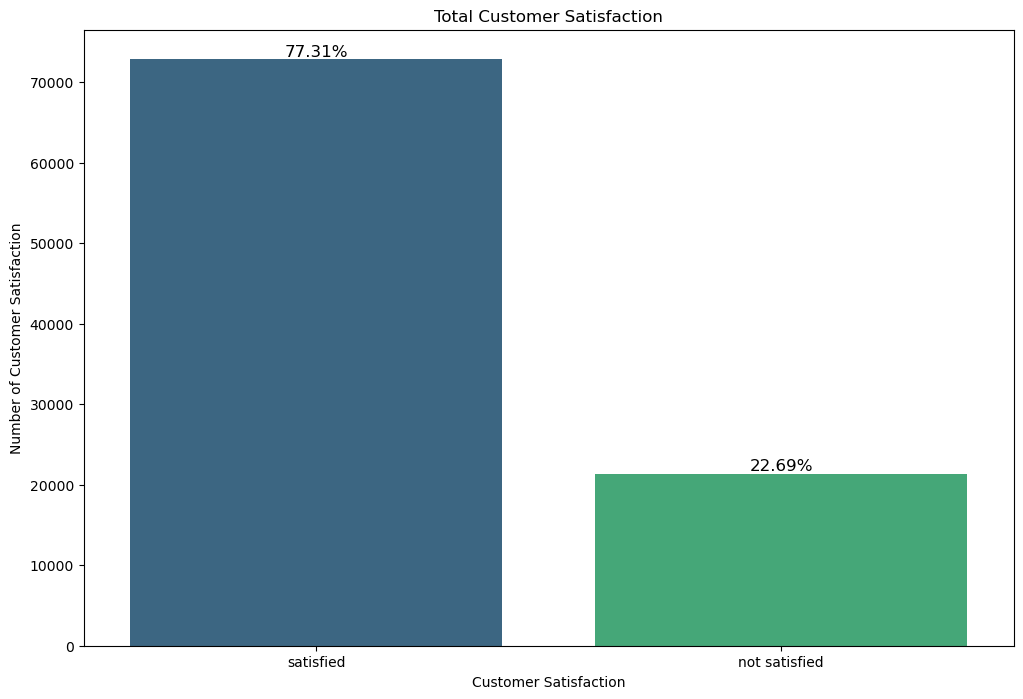

In [123]:
# Menghitung persentase dari customer yang satisfied dan not satisfied
customer_satisfaction_percentage = (
    average_customer_review['customer_satisfaction']
    .value_counts(normalize=True) * 100
).reset_index(name='percentage')

customer_satisfaction_percentage.rename(columns={'index': 'customer_satisfaction'}, inplace=True)

# Visualisasi dengan persentase
plt.figure(figsize=(12, 8))
sns.countplot(data=average_customer_review, x='customer_satisfaction', palette="viridis")
plt.title("Total Customer Satisfaction")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Number of Customer Satisfaction")

# Add persentase ke chart
for index, value in enumerate(customer_satisfaction_percentage['percentage']):
    plt.text(
        x=index,
        y=average_customer_review['customer_satisfaction'].value_counts()[index],
        s=f"{value:.2f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

plt.show()

### Insight & Suggestion/Recommendation from Total Customer Satisfaction
Insight:  
- Jumlah customer yang kurang puas dengan transaksinya di OLIST cukup banyak mencapai 22% dari total transaksi yang terjadi di tahun 2016 sampai 2019. Hal ini perlu didalami lagi penyebabnya.

Suggestion/Recommendation:  
- Untuk mengatasi problem not satisfied customer dalam jangka pendek bisa mengerahkan tim Customer Service untuk me-reach out kembali customer-customer yang memberi review di bawah 4 dan menanyakan apa keluhan mereka agar bisa diperbaiki dan mengurangi review buruk di masa depan.
- Untuk jangka panjang dan untuk memudahkan proses analisa data not satisfied customer, kita bisa meminta bantuan tim Engineer untuk menambahkan 1 fitur lagi di kolom review berupa drop down list berisi alasan-alasan review yang biasanya diberikan oleh customer. Drop down list ini berguna agar data review bisa disegmentasikan berdasarkan list yang kita berikan dan memudahkan tim data menentukan alasan apa yang paling banyak menyebabkan bad review.

### 2.	Select a customer who fills in the title and message review, then create a table to calculate the total reviews for each customer and combine it with the total order table to find information on the review ratio per transaction for each customer

In [126]:
# Memfilter data untuk mengambil data yang mempunyai review title dan review comemnt saja 
# Karena pada proses Data Cleansing saya mengisi null value review title dan review message dengan "No Review Comment", 
# maka saya hanya perlu memfilter out baris data yang tidak memiliki 'No Review Comment' di kolom review_comment_title atau review_comment_message
filterout_no_review_comment = df[
    (df['review_comment_title'] != 'No Review Comment') & 
    (df['review_comment_message'] != 'No Review Comment')
]

# Tabel untuk menghitung total review untuk tiap customer
total_reviews_per_customer = filterout_no_review_comment.groupby('customer_unique_id').size().reset_index(name='total_reviews')

# Tabel untuk menghitung total order dari tiap customer
total_orders_per_customer  = df.groupby('customer_unique_id').agg(total_orders=('order_id', 'count')).reset_index()

# Lalu di merge 2 tabel sebelumnya untuk menghitung rasio total review vs total order
customer_review_ratio = pd.merge(total_reviews_per_customer, total_orders_per_customer, on='customer_unique_id')
customer_review_ratio['review_ratio_per_transaction'] = customer_review_ratio['total_reviews'] / customer_review_ratio['total_orders']

customer_review_ratio

,customer_unique_id,total_reviews,total_orders,review_ratio_per_transaction
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,1.0
1,000ec5bff359e1c0ad76a81a45cb598f,1,1,1.0
2,00172711b30d52eea8b313a7f2cced02,1,1,1.0
3,001928b561575b2821c92254a2327d06,2,2,1.0
4,0019e8c501c85848ac0966d45226fa1d,1,1,1.0
...,...,...,...,...
9595,ffeb904468642a1ce663a322629801cb,1,1,1.0
9596,ffecceca389973ef16660d58696f281e,1,1,1.0
9597,fff2ae16b99c6f3c785f0e052f2a9cfb,1,1,1.0
9598,fff3e1d7bc75f11dc7670619b2e61840,1,1,1.0


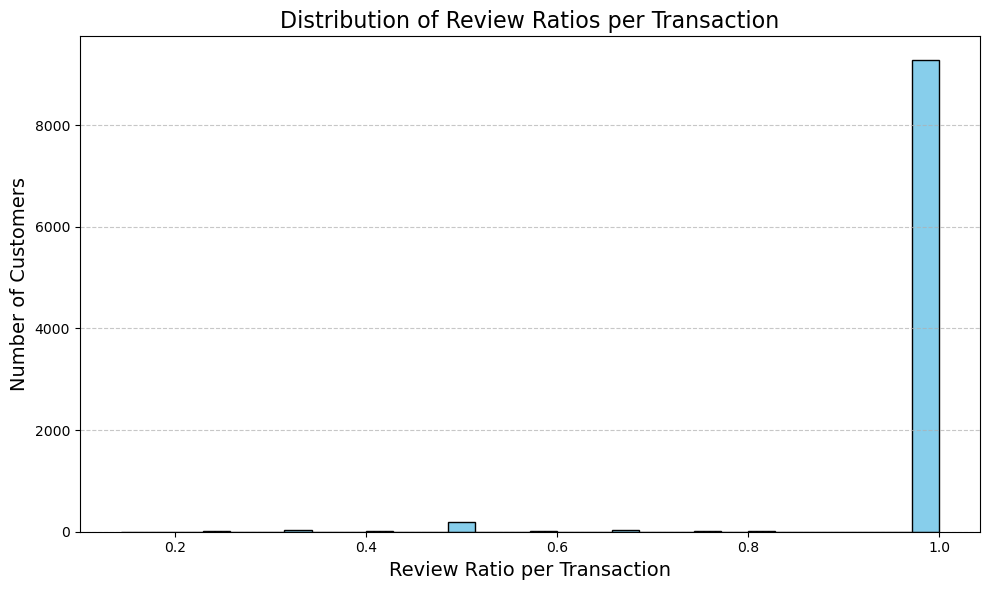

In [127]:
# Histogram untuk rasio total review vs total order
plt.figure(figsize=(10, 6))
plt.hist(customer_review_ratio['review_ratio_per_transaction'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Ratios per Transaction', fontsize=16)
plt.xlabel('Review Ratio per Transaction', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insight & Suggestion/Recommendation from Distribution of Review Ratios per Transaction
Insight:  
- Rasio 1.0 artinya customer melakukan order sekaligus memberikan review dan jumlahnya cukup banyak, lebih dari 9000 transaksi memiliki review.
- Rasio 0.5, 0.3 dan 0.7 cukup banyak sekitar 30 sampai 200an transaksi, artinya ada beberapa customer yang melakukan beberapa kali transaksi tapi tidak memberikan review di semua transaksinya.
- Dari 94.000 an score review yang diberikan, hanya 9.600 review yang disertai review title dan review comments atau sekitar 10%
- Dari 10% tersebut masih terbagi lagi review satisfied dan not satisfied. Dan review dari customer yang not satisfied sangat berharga untuk perbaikan pelayanan OLIST kedepannya.  

Suggestion/Recommendation:  
- Tim Data Analyst bisa mendalami lebih dalam data review customer ‘not satisfied’ dari 9600 customer dan bekerja sama dengan tim terkait untuk memperbaikinservice yang diberikan

# STEP 9: Time Series Analysis
1. Cohort Analysis to see OLIST's customer retention rates throught out the report period
2. Monthly Revenue Trend to see OLIST revenue through out the years
3. Monthly Average Delivery Times to analyze the average time for OLIST to fulfill each transaction every month
4. Time series analysis is an analysis to see the trend of a phenomenon based on time. Try totaling the sales of each item per day. What are the sales trends? Is there an increase, decrease, or stagnant. What should business do?  
5.	Perform a seasonality analysis by looking at the total orders per day from Monday to Sunday.  

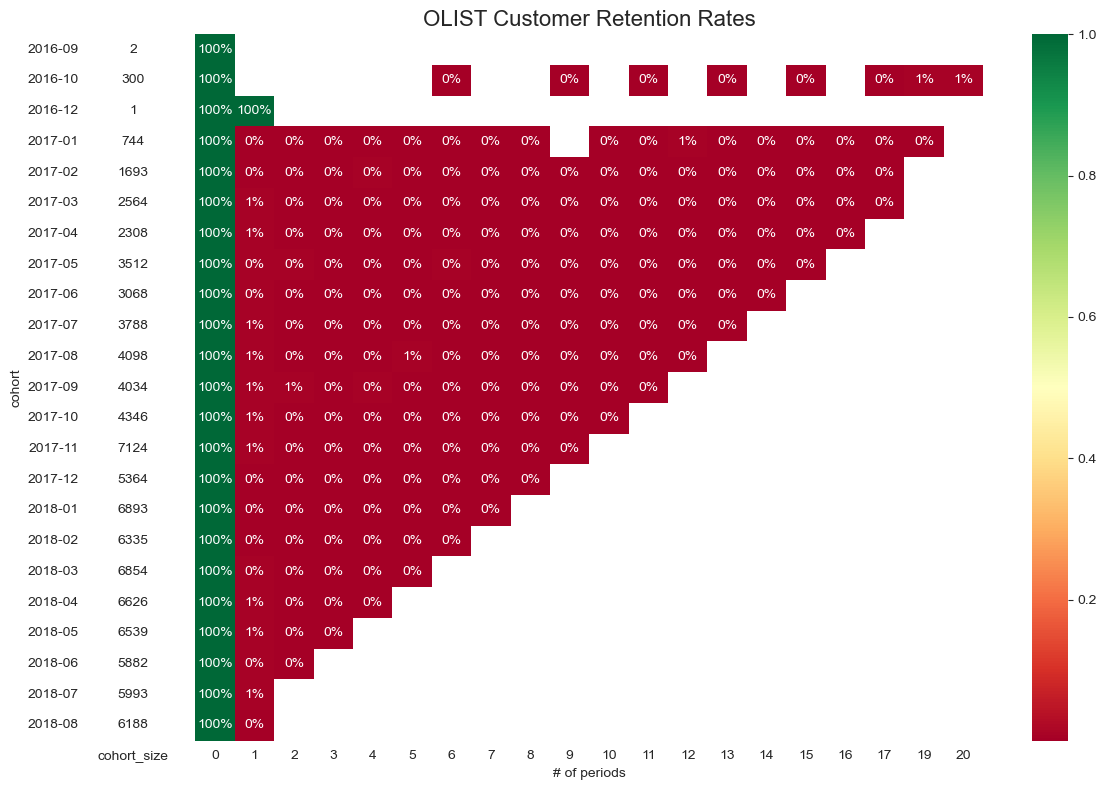

In [130]:
# Extract the order month and cohort month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df['cohort'] = df.groupby('customer_unique_id')['order_purchase_timestamp'] \
                             .transform('min') \
                             .dt.to_period('M')

# Group by cohort and order_month to count unique customers
df_cohort = df.groupby(['cohort', 'order_month']) \
                    .agg(n_customers=('customer_unique_id', 'nunique')) \
                    .reset_index(drop=False)

# Calculate the period number
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

# Create a pivot table for the cohort analysis
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')

# Calculate the retention matrix
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# Rotate the y-axis labels for the cohort months to horizontal orientation
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Retention matrix heatmap
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])

    ax[1].set_title('OLIST Customer Retention Rates', fontsize=16)
    ax[1].set(xlabel='# of periods', ylabel='')
    ax[1].tick_params(axis='y', rotation=0)  # Set y-axis labels to horizontal

    # Cohort size heatmap
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    ax[0].tick_params(axis='y', rotation=0)  # Set y-axis labels to horizontal

    fig.tight_layout()
    plt.show()

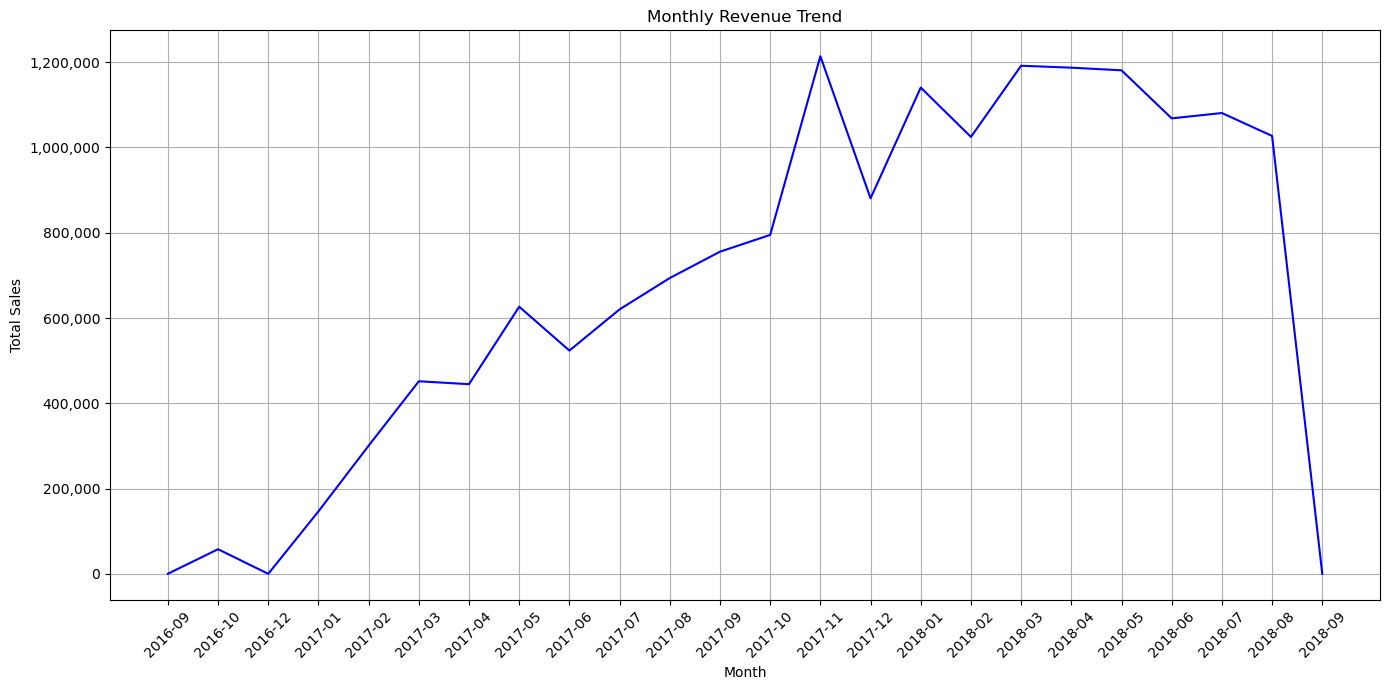

In [131]:
# For sales trends, let's aggregate the sales by month and year
sales_trends = df.groupby(['year', 'order_month']).agg(
    total_sales=('total_order_value', 'sum'),
    average_order_value=('total_order_value', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

# Convert 'order_month' to string for proper plotting
sales_trends['order_month'] = sales_trends['order_month'].astype(str)

# Convert the specified columns back to integer type
# sales_trends['total_sales'] = sales_trends['total_sales'].astype(float).astype(int)
# sales_trends['average_order_value'] = sales_trends['average_order_value'].astype(float).astype(int)
# sales_trends['total_orders'] = sales_trends['total_orders'].astype(int)

# Sales Trends Visualization
plt.figure(figsize=(14, 7))
plt.plot(sales_trends['order_month'], sales_trends['total_sales'], linestyle='-', color='b')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # format y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility
plt.tight_layout()
plt.show()

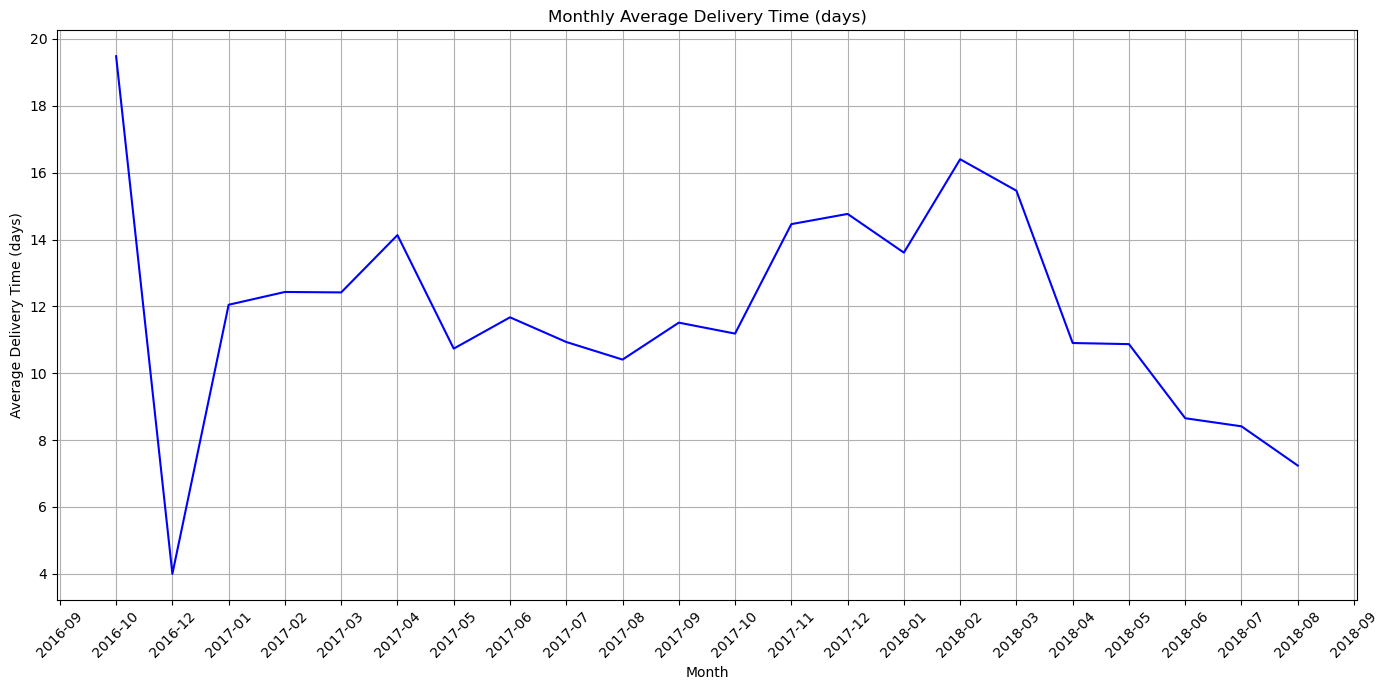

In [132]:
# For delivery performance, we will calculate the delivery time by subtracting the order purchase timestamp from the delivery date
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

delivery_performance = df.groupby('order_month').agg(average_delivery_time=('delivery_time', 'mean'),total_orders=('order_id', 'count')).reset_index()

# Convert 'order_month' to string for proper plotting
delivery_performance['order_month'] = delivery_performance['order_month'].astype(str)

# Sales Trends Visualization
plt.figure(figsize=(14, 7))
plt.plot(delivery_performance['order_month'], delivery_performance['average_delivery_time'], linestyle='-', color='b')
plt.title('Monthly Average Delivery Time (days)')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility
plt.tight_layout()
plt.show()

### 1.	Time series analysis is an analysis to see the trend of a phenomenon based on time. Try totaling the sales of each item per day. What are the sales trends? Is there an increase, decrease, or stagnant. What should business do?  

In [134]:
# Mengelompokkan data berdasarkan hari dan menghitung jumlah orderan
daily_orders = df.groupby('day_name').agg(total_orders=('order_id', 'count')).reset_index()

# Mengatur urutan hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_orders['day_name'] = pd.Categorical(daily_orders['day_name'], categories=day_order, ordered=True)

# Mengurutkan data berdasarkan urutan hari
daily_orders = daily_orders.sort_values('day_name')

daily_orders

,day_name,total_orders
1,Monday,18957
5,Tuesday,18961
6,Wednesday,18184
4,Thursday,17488
0,Friday,16678
2,Saturday,12621
3,Sunday,13861


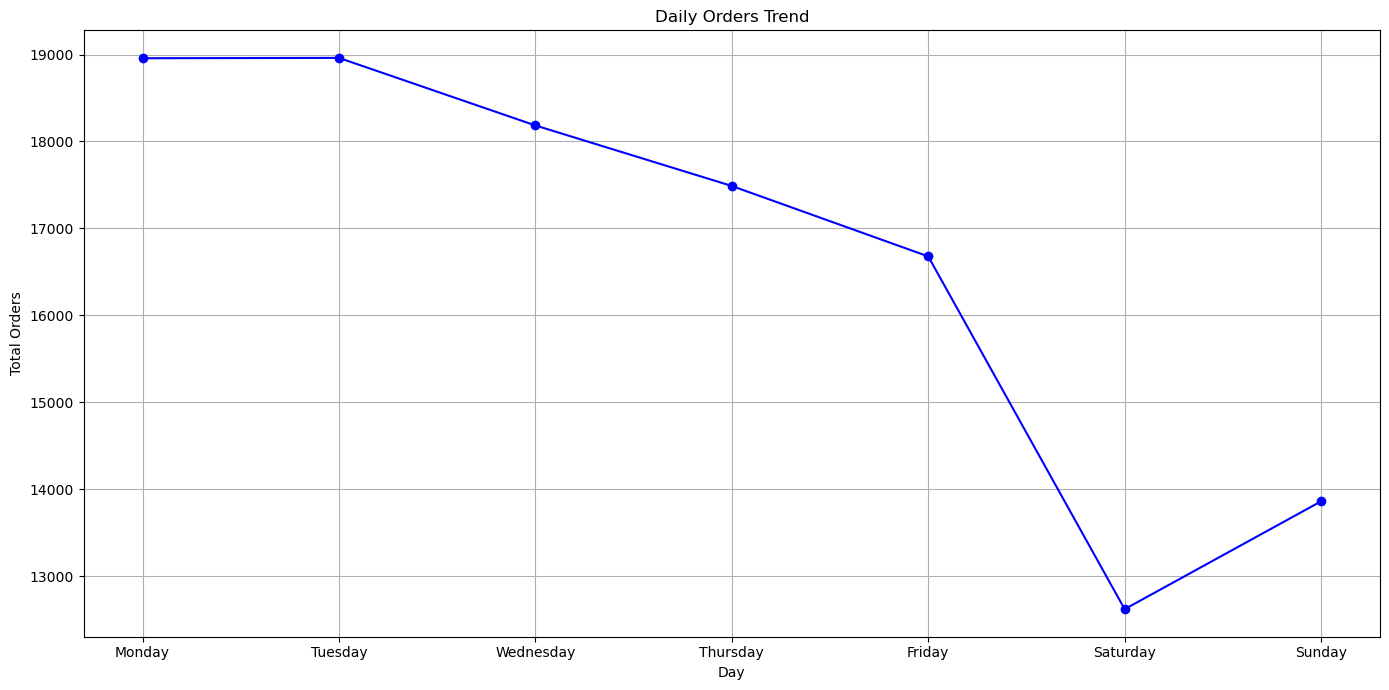

In [135]:
# Visualisasi tabel daily_orders
plt.figure(figsize=(14, 7))
plt.plot(daily_orders['day_name'], daily_orders['total_orders'], marker='o', linestyle='-', color='b')
plt.title('Daily Orders Trend')
plt.xlabel('Day')
plt.ylabel('Total Orders')
plt.grid()
plt.tight_layout()
plt.show()

### 2.	Perform a seasonality analysis by looking at the total orders per day from Monday to Sunday.

In [137]:
# Mengelompokkan data berdasarkan hari dan menghitung total order value
daily_sales = df.groupby('day_name').agg(total_sales=('total_order_value', 'sum')).reset_index()

# Mengatur urutan hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['day_name'] = pd.Categorical(daily_sales['day_name'], categories=day_order, ordered=True)

# Mengurutkan data berdasarkan urutan hari
daily_sales = daily_sales.sort_values('day_name')

daily_sales

,day_name,total_sales
1,Monday,2669059.41
5,Tuesday,2623428.16
6,Wednesday,2555802.60
4,Thursday,2461786.97
0,Friday,2360730.59
2,Saturday,1817363.45
3,Sunday,1924043.45


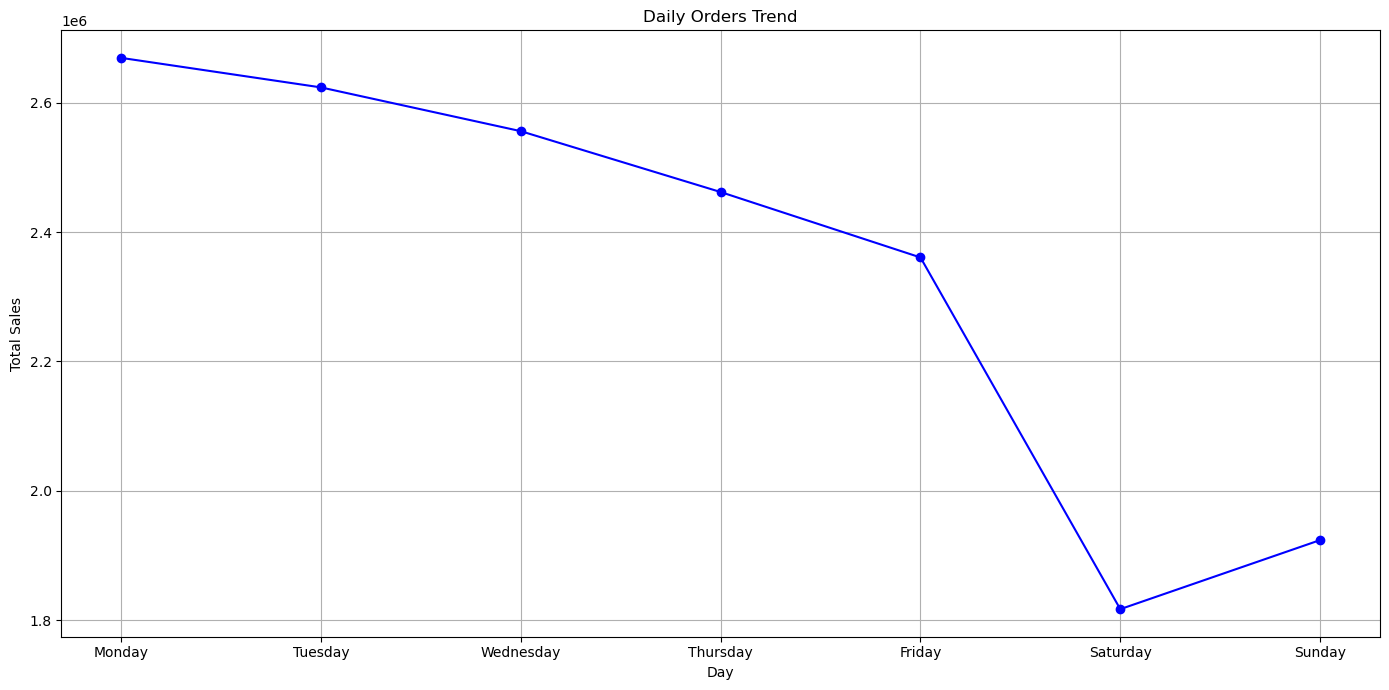

In [138]:
# Visualisasi tabel daily_sales
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['day_name'], daily_sales['total_sales'], marker='o', linestyle='-', color='b')
plt.title('Daily Orders Trend')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid()
plt.tight_layout()
plt.show()

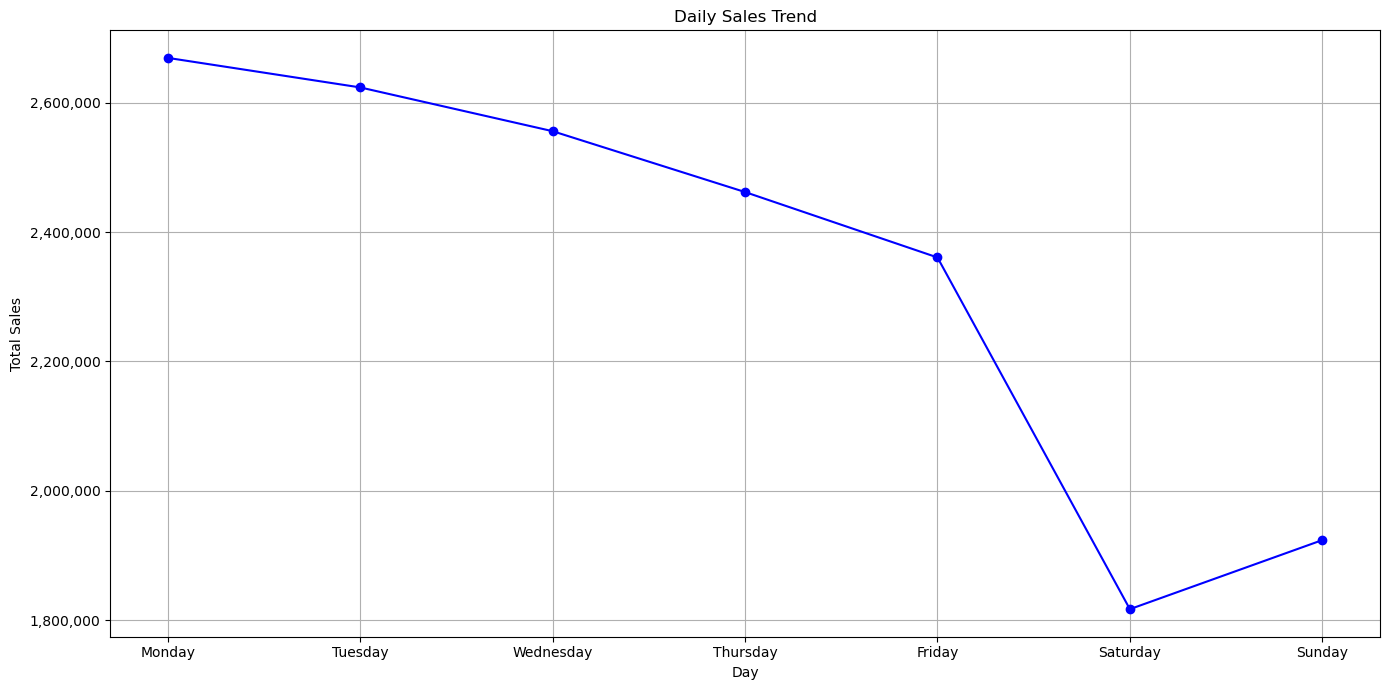

In [139]:
# Visualisasi tabel daily_sales dengan menunjukkan angka y-axis secara penuh tidak menggunakan penyingkatan angka 6 angka belakng (1e6)
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['day_name'], daily_sales['total_sales'], marker='o', linestyle='-', color='b')
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

### Insight & Suggestion/Recommendation from Daily Orders Trend dan Daily Sales Trend
Insight: 
1. Retention Rates dari OLIST customers sangatlah buruk, hampir tidak ada new customer tiap bulannya yang kembali berbelanja di bulan-bulan berikutnya. Hasil cohort analysis ini memastikan lebih jauh kalau adanya permasalahan __Single Transaction Customer__ dimana OLIST tidak bisa membuat new customer berbelanja kembali.
2. Biarpun ada permasalahan Single Transaction Customer yang dialami OLIST, namun secara total revenue mengalami trend kenaikan sepanjang 2016-2018. Ini artinya new customers yang digenerate OLIST bisa menopang performa revenue OLIST, namun missed opportunity dari new customer yang tidak berbelanja lagi sangat disayangkan. Selain itu keadaan dimana new customers bisa menopang performa revenue OLIST tidak mungkin berjalan terus selamanya, pasti akan ada masa dimana new customers tidak lagi bermunculan, maka perlu ada perbaikan untuk menghadapi problem Single Transaction Customers.  
      Note: Penurunan total revenue di September 2019 diakibatkan data perbulannya yang tidak lengkap atau tidak ada 30 hari.
  
3. Average delivery time masih menjadi kendala dengan rata-rata waktu pengiriman di atas 10 hari. Ditambah transaksi terbanyak datang dari Sao Paulo dan kota-kota sekitarnya, dimana kota tersebut dekat dengan homebase OLIST di Sao Paulo. Maka waktu kirim rata-rata di atas 10 hari untuk kota Sao Paulo dan sekitarnya sangatlah buruk. Perlu ada perbaikan oleh tim order processing dan tim logistik untuk mengatasi delivery time yang sangat panjang ini. 
4. Baik jumlah transaksi maupun jumlah value transaksi mengalami trend yang sama di setiap harinya.
5. Transaksi di weekend mengalami penurunan yang sangat signifikan dan transaksi hari sabtu adalah yang paling rendah.  

Suggestion/Recommendation:  
1. Meningkatkan frekuensi customer berbelanja kembali, dengan cara :
    - Melakukan loyalty program, jadi makin sering customer berbelanja, makin banyak benefit dan promo yang bisa mereka dapat. 
    - Melakukan blast email berisi promo-promo ke semua customer yang pernah mendaftarkan email mereka ke database OLIST.
      
2. Memperbaiki delivery time dengan mamastikan waktu order processing di internal berjalan dengan seamless tanpa halangan, baru setelah itu memastikan logistik internal atau partner logistik perusahaan OLIST beroperasional dengan maksimal agar barang pesanan segera diantar tanpa harus menyangkut di proses pengiriman logistik. Common case yang biasanya terjadi di logistik adalah saat penyortiran untuk menentukan pengiriman ke area mana terjadi permasalahan atau human error. Maka untuk menghadapi ini bisa dilakukan pelatihan bagi para karyawan logistik atau untuk rencana jangka panjang bisa menggunakan bantuan sistem mesin untuk proses menyortir barang yang akan dikirim.
3. Promosi dan campaign bisa difokuskan di weekday untuk menjamin efek maksimum dari promosi dan campaign tersebut.
4. Untuk meningkatkan transaksi di weekend, bisa dimulai dari pembuatan promosi dan campaign tiap weekend agar customer behaviour mulai terbentuk dan customer selalu mengingat kalau OLIST menawarkan promosi dan campaign  tiap weekend.
5. Investigasi lebih lanjut penyebab penurunan transaksi di hari Sabtu dan Minggu. Investigasinya bisa dengan cara internal dan external.
    - Internal: memeriksa website OLIST dan memastikan tidak ada kendala yang menghambat customer bertransaksi di weekend. Selain itu bisa juga memastikan promosi dan campaign yang berjalan di weekend sudah berjalan dengan maksimal.
    - Eksternal: Melakukan survei ke customer untuk mendapatkan insight tentang shopping behaviour mereka di akhir pekan.

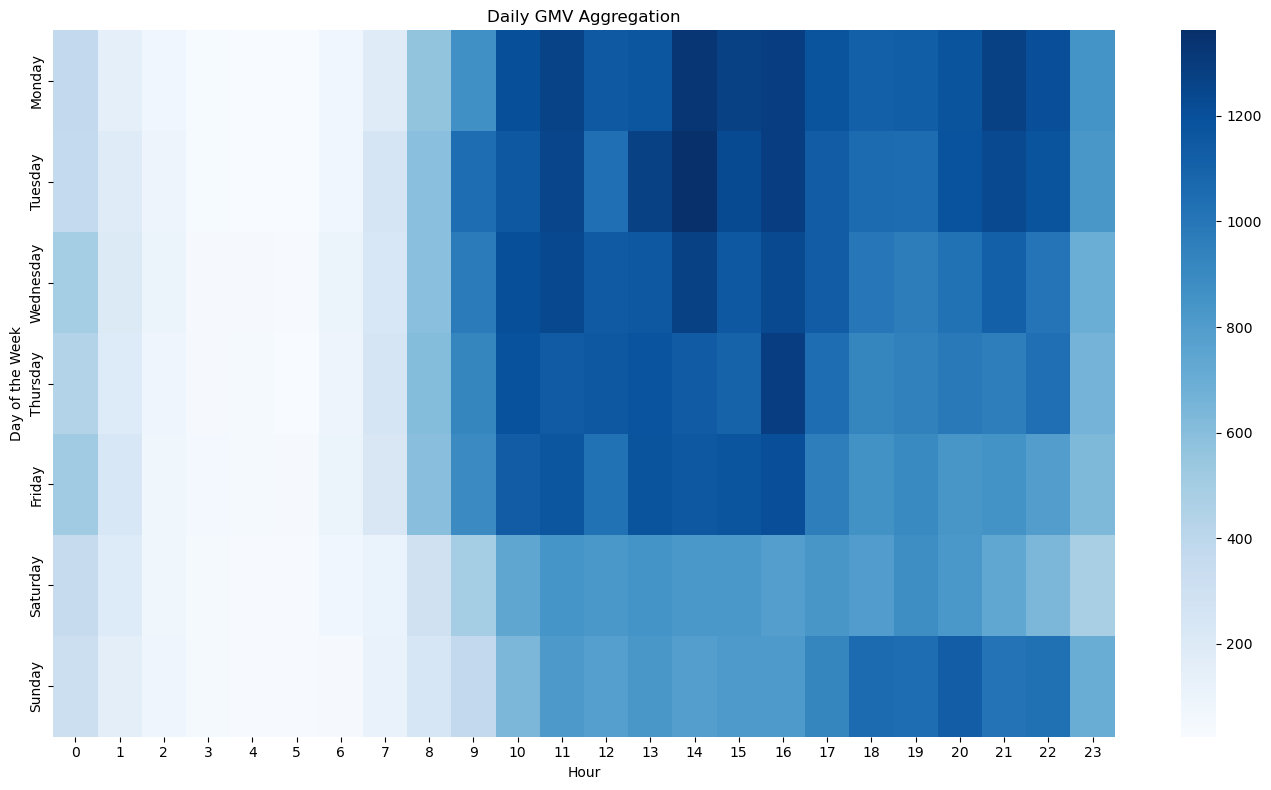

In [141]:
# Kelompokkan berdasarkan day_name dan jam untuk menghitung total order
heatmap_data = df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)

# Mengurutkan hari berdasarkan urutan yang benar
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=False, cbar=True)
plt.title('Daily GMV Aggregation')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()

### Insight & Suggestion/Recommendation from the heatmap of Daily GMV Aggregation
Insight:  
- Transaksi lebih banyak terjadi di weekday (Senin-Jumat)
- Transaksi di weekend jauh berkurang dibanding weekday terutama di hari Sabtu
- Customer mulai betransaksi dari jam 09.00-22.00 dan di weekday puncak transaksi terjadi mulai jam 12.00-16.00.
- Pada hari Sabtu jumlah transaksi paling rendah dan stabil jumlahnya rendah sepanjang hari.
- Pada hari Minggu mulai banyak transaksi di jam 17.00-22.00.

Suggestion/Recommendation:  
- Promosi dan campaign bisa difokuskan di weekday dan periode waktunya jam 12.00-16.00 di weekday dan 17.00-22.00 di weekend untuk memaksimalkan hasil promosi dan campaign.
- Untuk meningkatkan transaksi di weekend, bisa dimulai dari pembuatan promosi dan campaign tiap weekend agar customer behaviour mulai terbentuk dan customer selalu mengingat kalau OLIST menawarkan promosi dan campaign  tiap weekend.
- Investigasi lebih lanjut penyebab penurunan transaksi di hari Sabtu dan Minggu. Investasinya bisa dengan cara internal dan external.
    - Internal: memeriksa website OLIST dan memastikan tidak ada kendala yang menghambat customer bertransaksi di weekend. Selain itu bisa juga memastikan promosi dan campaign yang berjalan di weekend apakah sudah maksimal atau belum.
    - Eksternal: Melakukan survei ke customer untuk mendapatkan insight tentang shopping behaviour mereka di akhir pekan.

In [143]:
# Pertama, untuk menghitung average number of items dari tiap customer, saya menggunakan tabel total_orders yang ada di total_customer_orders
# Karena kolom total_orders di total_customer_orders sudah menghitung number of items per customer, maka saya tinggal menghitung mean dari tabel tsb 
total_customer_orders = df.groupby('customer_unique_id').agg(total_orders=('order_id', 'count')).reset_index()

# Kedua buat define function untuk melabeli hasil average number of items, yang di bawah 5 as 'a little', else 'a lot'
def customer_order_frequency(total_orders):
    if total_orders < 2:
        return '1'
    elif total_orders < 3:
        return '2'
    elif total_orders < 4:
        return '3'
    elif total_orders < 5:
        return '4'
    else:
        return 'a lot'

# Ketiga tambahin kolom 'order_frequency' 
# yang isinya mengapply function average_per_order ke kolom avg_item_ordered yang ada di tabel total_customer_order
total_customer_orders['order_frequency'] = total_customer_orders['total_orders'].apply(customer_order_frequency)

total_customer_orders

,customer_unique_id,total_orders,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
94251,fffcf5a5ff07b0908bd4e2dbc735a684,2,2
94252,fffea47cd6d3cc0a88bd621562a9d061,1,1
94253,ffff371b4d645b6ecea244b27531430a,1,1
94254,ffff5962728ec6157033ef9805bacc48,1,1


C:\Users\benny\AppData\Local\Temp\ipykernel_4296\2074022125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=total_customer_orders, x='order_frequency', palette="viridis")


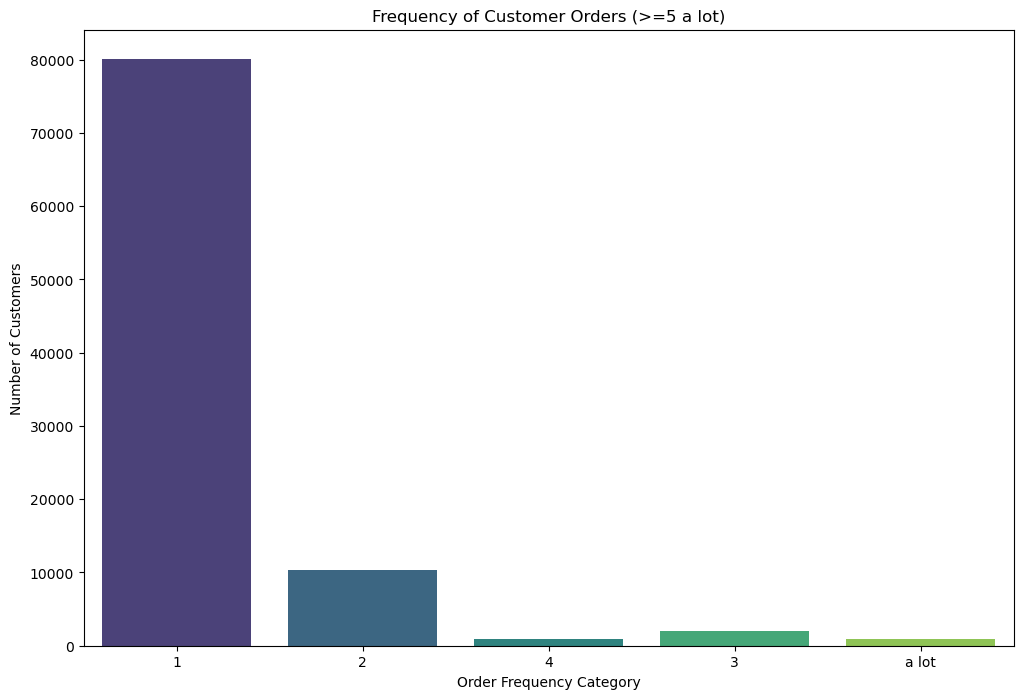

In [144]:
# Visualization
plt.figure(figsize=(12, 8))
sns.countplot(data=total_customer_orders, x='order_frequency', palette="viridis")
plt.title("Frequency of Customer Orders (>=5 a lot)")
plt.xlabel("Order Frequency Category")
plt.ylabel("Number of Customers")
plt.show()

Insight:  
- Bisa dipastikan problem “Single-Transaction Customer” benar-benar terjadi di OLIST dan angkanya hampir menyentuh angka 80.000 customers dengan disusul oleh 10.000 customer yang bertransaksi hanya 2x sepanjang 2016-2018.
- Dari OLIST Customer Retention Rates chart periode 2016-2018 juga dapat dipastikan “Single-Transaction Customer” benar-benar terjadi karena penurunan sangat signifikan di retention rates setelah bulan pertama.

Suggestion/Recommendation:  
- Maka suggestion/recommendation yang perlu dijalankan adalah seperti suggestion/recommendation yang sudah disampaikan sebelumnya dengan cara: 
1. Meningkatkan frekuensi customer berbelanja kembali, dengan cara :
    - Melakukan loyalty program, jadi makin sering customer berbelanja, makin banyak benefit dan promo yang bisa mereka dapat. 
    - Melakukan blast email berisi promo-promo ke semua customer yang pernah mendaftarkan email mereka ke database OLIST.
2. Meningkatkan jumlah item per transaksi yang dilakukan customer, dengan cara:
    - Melakukan promosi bundling dengan tawaran diskon yang lebih tinggi bila customer membeli lebih dari 1 produk
    - Melakukan promosi cross-selling category dengan menawarkan customer produk kategori lain yang menjadi barang pelengkap untuk produk yang telah dia beli.